# Final Project Submission

Please fill out:
* Student name: Anthony Ngatia
* Student pace: part time
* Scheduled project review date/time: 22 March 2023 / 9.00PM EAT 
* Instructor name: Samwel Jane



## Business Problem

### Regression modeling to analyze house sales in a northwestern county.


A project for a real estate agency that helps homeowners buy and/or sell homes.

The goals of the project are to use regression modeling to analyze house sales in a northwestern county and advice homeowners about the varaiables affecting the pricing of houses.

In [1]:
#Importing the distribution function librbaries
from scipy import stats
from scipy.stats import norm
from __future__ import print_function

#Importing the Libraries required for Analysis
import pandas as pd
import numpy as np
import seaborn as sns;sns.set_theme(style = 'darkgrid')
import matplotlib.pyplot as plt

#Filter out warnings
import warnings
warnings.filterwarnings('ignore')



Using the CRISP-DM Data Science Method 

### Data Understanding

In [2]:
#Loading the King County House Sales dataset
dataset = pd.read_csv('data/kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Investigating the rows and columns of the dataset

In [4]:
dataset.shape

(21597, 21)

In [5]:
print('The Kind County House Sales Dataset has ' + str(dataset.shape[0]) + 'rows and '+ str(dataset.shape[1]) + 'columns. ')

The Kind County House Sales Dataset has 21597rows and 21columns. 


In [6]:
#Displaying the column names for a better understanding of the data
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

###  Data Cleaning

In [7]:
#The dataset contains column names that may be redundant in our analysis.

In [8]:
#Dropping the redundant columns
dataset1 = dataset.drop(['date','view','sqft_above','sqft_basement','yr_renovated','zipcode',
                      'lat','long','sqft_living15','sqft_lot15'], axis = 'columns')
dataset1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [9]:
#investigating the number of missing values
dataset1.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [10]:
dataset1.shape

(21597, 11)

In [11]:
#The waterfront has missing values of 2376, we can proceed to replace the null values with a value of 0.
dataset1['waterfront'] = dataset1['waterfront'].fillna(0)

#confirming the null values 
dataset1.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [12]:
#checking for duplicate values
dataset1.duplicated().sum()

3

In [13]:
#since we have duplicated values, we proceed to identify the duplicates
dataset1[dataset1.duplicated(keep=False)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3946,1825069031,550000.0,4,1.75,2410,8447,2.0,0.0,4,8,1936
3947,1825069031,550000.0,4,1.75,2410,8447,2.0,0.0,4,8,1936
14968,6308000010,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2001
14969,6308000010,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2001
20037,8648900110,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,2009
20038,8648900110,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,2009


In [14]:
#We proceed to drop the duplicates
dataset1.drop_duplicates(inplace=True)

dataset1.duplicated().sum()

0

In [15]:
# We want to identify the data types in the different columns
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21594 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21594 non-null  int64  
 1   price        21594 non-null  float64
 2   bedrooms     21594 non-null  int64  
 3   bathrooms    21594 non-null  float64
 4   sqft_living  21594 non-null  int64  
 5   sqft_lot     21594 non-null  int64  
 6   floors       21594 non-null  float64
 7   waterfront   21594 non-null  float64
 8   condition    21594 non-null  int64  
 9   grade        21594 non-null  int64  
 10  yr_built     21594 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


In [16]:
#removing any special characters
for columns in dataset1:
    dataset1[columns] = dataset1[columns].replace({'\$':'','\,':''}, regex = True)

We proceed to change column names: Floors and Waterfront to int values as they are currently float types

In [17]:
#changing the datatype from float to integer
dataset1[['floors','waterfront']] = dataset1[['floors','waterfront']].astype(int)
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21594 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21594 non-null  int64  
 1   price        21594 non-null  float64
 2   bedrooms     21594 non-null  int64  
 3   bathrooms    21594 non-null  float64
 4   sqft_living  21594 non-null  int64  
 5   sqft_lot     21594 non-null  int64  
 6   floors       21594 non-null  int32  
 7   waterfront   21594 non-null  int32  
 8   condition    21594 non-null  int64  
 9   grade        21594 non-null  int64  
 10  yr_built     21594 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 1.8 MB


In [69]:
#normalising the dataset for easier visualisation using unbiased estimates

dataset1.iloc[:,0:-1] = dataset1.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
dataset1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,0.886068,-0.866628,-0.402879,-1.450938,-0.980546,-0.228194,-0.808310,-0.082504,-0.629968,-0.560688,-0.544577
1,0.637451,-0.006242,-0.402879,0.174497,0.533342,-0.189754,1.004407,-0.082504,-0.629968,-0.560688,-0.680751
2,0.365405,-0.980674,-1.482389,-1.450938,-1.427088,-0.123160,-0.808310,-0.082504,-0.629968,-1.413027,-1.293537
3,-0.727612,0.173402,0.676631,1.149758,-0.131026,-0.243889,-0.808310,-0.082504,2.444276,-0.560688,-0.204140
4,-0.912823,-0.082455,-0.402879,-0.150590,-0.435982,-0.169520,-0.808310,-0.082504,-0.629968,0.291652,0.544820


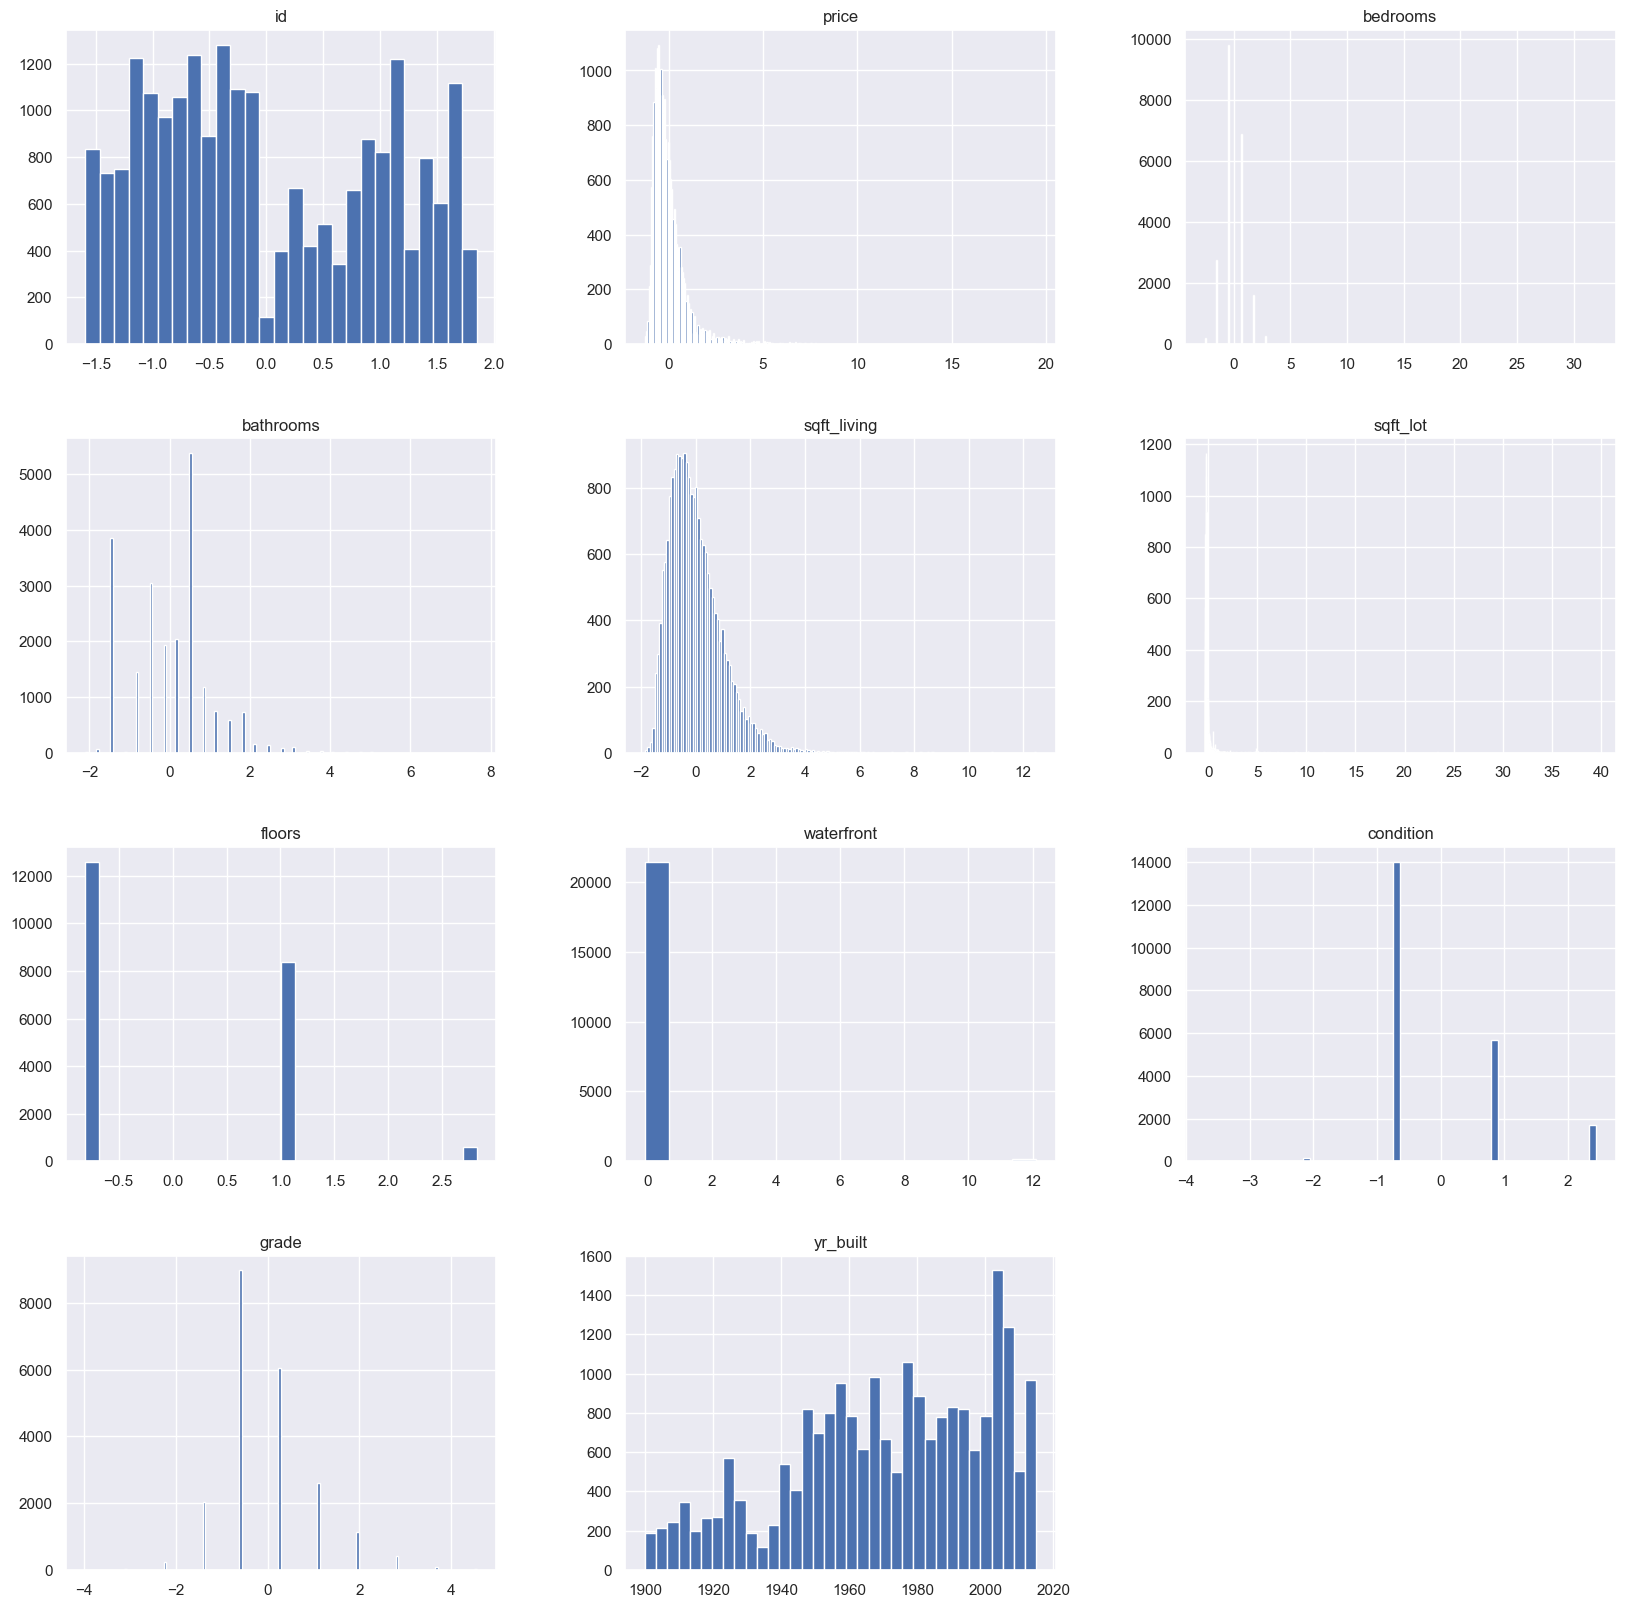

In [52]:
#Performing linearity assumption on the dataset
#Plotting a histogram of the data

dataset1. hist(figsize = (20,20), bins = 'auto');



### Observations
- The price and sqft living have a distribution that could approximate a normal distribution.
- The sqft_living, sqft-lot, price and bathrooms have continous data whereas  grade, condition, waterfront and floors have discrete data.
- Most houses are graded with a condition scaled at 3/5 with almost 14000 houses having a grade of 3 and the least houses < 2000 have a condition that is graded 5.
- Most houses have a single floor and the least houses have 3 floors.
- There is an increase in the total houses built from the year 1900- 2000 where there was a drop in the number of houses built. However, the number has started to increase from 2010 to 2020.


In [35]:
#To plot the kde distributions, we proceed to plot for the continous data sets
#Working with price,sqft_living,sqft_loft 
subset = ['price','sqft_living','sqft_lot']
dataset_1 = dataset1.loc[:, subset]
dataset_1.columns

Index(['price', 'sqft_living', 'sqft_lot'], dtype='object')

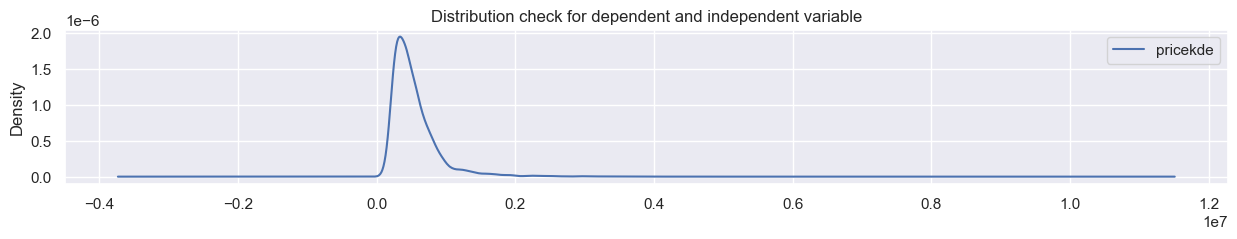

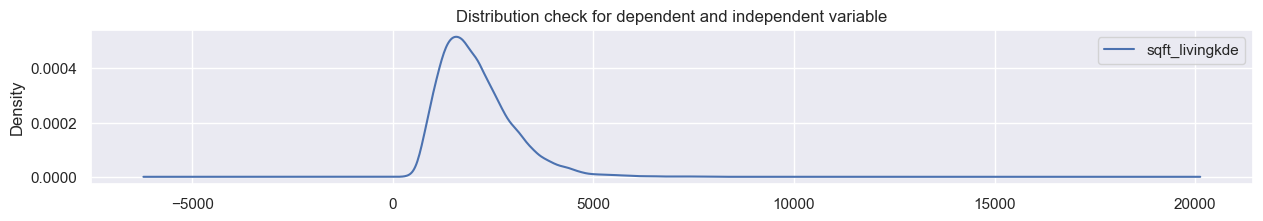

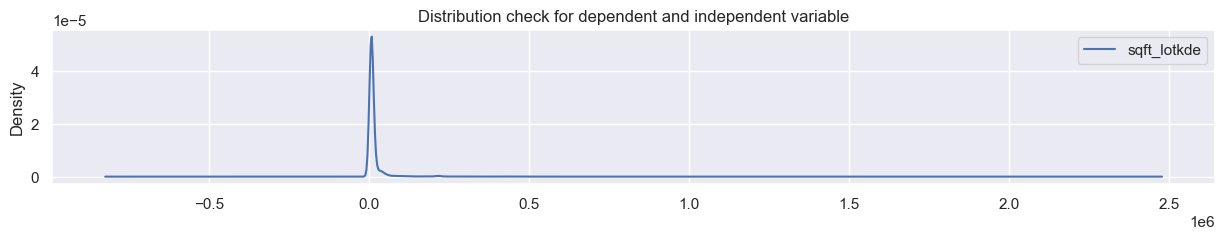

In [53]:
#Plotting a kde distribution to visualise the normal distribution plots

for column in dataset_1:
    dataset_1[column].plot.kde(label = column + 'kde', figsize = (15,2))
    plt.title('Distribution check for dependent and independent variable')
    plt.legend()
    plt.show()

### Observations

- The distributions appear to have a normal distribution.
- However, the kde plots for the price and sqft_living appear to be slightly positively skewed.
- The kurtosis for sqft_lot has a leptokurtic shape.

In [20]:
# We proceed to identify price as our dependent variable and select:
# - Sqft_living, bedrooms, bathrooms and grade as our predictors.


In [21]:
dataset['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3622, dtype: int64

In [54]:
# Performing a simple linear regression with each variable as a predictor:
#importing the statsmodel library
from statsmodels.formula.api import ols

# Defining the regression formula (Sqft_living)

f = 'price~sqft_living'
model = ols(formula = f, data = dataset_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:07:28   Log-Likelihood:            -3.0002e+05
No. Observations:               21594   AIC:                         6.000e+05
Df Residuals:                   21592   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.349     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8651      1.940    144.810      0.000     277.063     284.667
==============================================================================
Omnibus:                    14798.824   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542418.256
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.897   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Defining the regression formula (Sqft_lot)

f = 'price~sqft_lot'
model = ols(formula = f, data = dataset1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           5.61e-40
Time:                        05:07:32   Log-Likelihood:                -30552.
No. Observations:               21594   AIC:                         6.111e+04
Df Residuals:                   21592   BIC:                         6.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.032e-16      0.007   1.52e-14      1.000      -0.013       0.013
sqft_lot       0.0899      0.007     13.261      0.000       0.077       0.103
==============================================================================
Omnibus:                    19132.563   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147230.080
Skew:                           4.029   Prob(JB):                         0.00
Kurtosis:                      37.787   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Defining the regression formula (bedrooms)
f = 'price~bedrooms'
model = ols(formula = f, data = dataset1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:07:36   Log-Likelihood:                -29558.
No. Observations:               21594   AIC:                         5.912e+04
Df Residuals:                   21592   BIC:                         5.914e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.032e-16      0.006   1.59e-14      1.000      -0.013       0.013
bedrooms       0.3088      0.006     47.707      0.000       0.296       0.321
==============================================================================
Omnibus:                    18827.794   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194617.555
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.593   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Defining the regression formula (bathrooms)
f = 'price~bathrooms'
model = ols(formula = f, data = dataset1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8255.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:07:38   Log-Likelihood:                -27144.
No. Observations:               21594   AIC:                         5.429e+04
Df Residuals:                   21592   BIC:                         5.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.979e-15      0.006  -6.88e-13      1.000      -0.011       0.011
bathrooms      0.5259      0.006     90.858      0.000       0.515       0.537
==============================================================================
Omnibus:                    17248.059   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882343.471
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.545   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Defining the regression formula (grade)
f = 'price~grade'
model = ols(formula = f, data = dataset1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:07:40   Log-Likelihood:                -24260.
No. Observations:               21594   AIC:                         4.852e+04
Df Residuals:                   21592   BIC:                         4.854e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.032e-16      0.005   2.04e-14      1.000      -0.010       0.010
grade          0.6680      0.005    131.891      0.000       0.658       0.678
==============================================================================
Omnibus:                    19875.828   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043047.021
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.948   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations

- R_squared explains how good our model is when compared to the baseline model.
- R_squared ranges between 0 -1 and a value closer to 1 represents an almost perfect fit.
- The variable with the highest R squared is sqft_living  followed by grade. Number of bedrooms has the lowest R_squared value.
- None of the variables has an almost ideal R_squared.

For the linearity equation (y = mx + c)
- We have the respective value for the different variables:
    

In [26]:
#We proceed to plot the qq plots

KC Housing Dataset - Regression Analysis and Diagnostics for price ~ id
-----------------------------------------------------------------------------
eval_env: 1


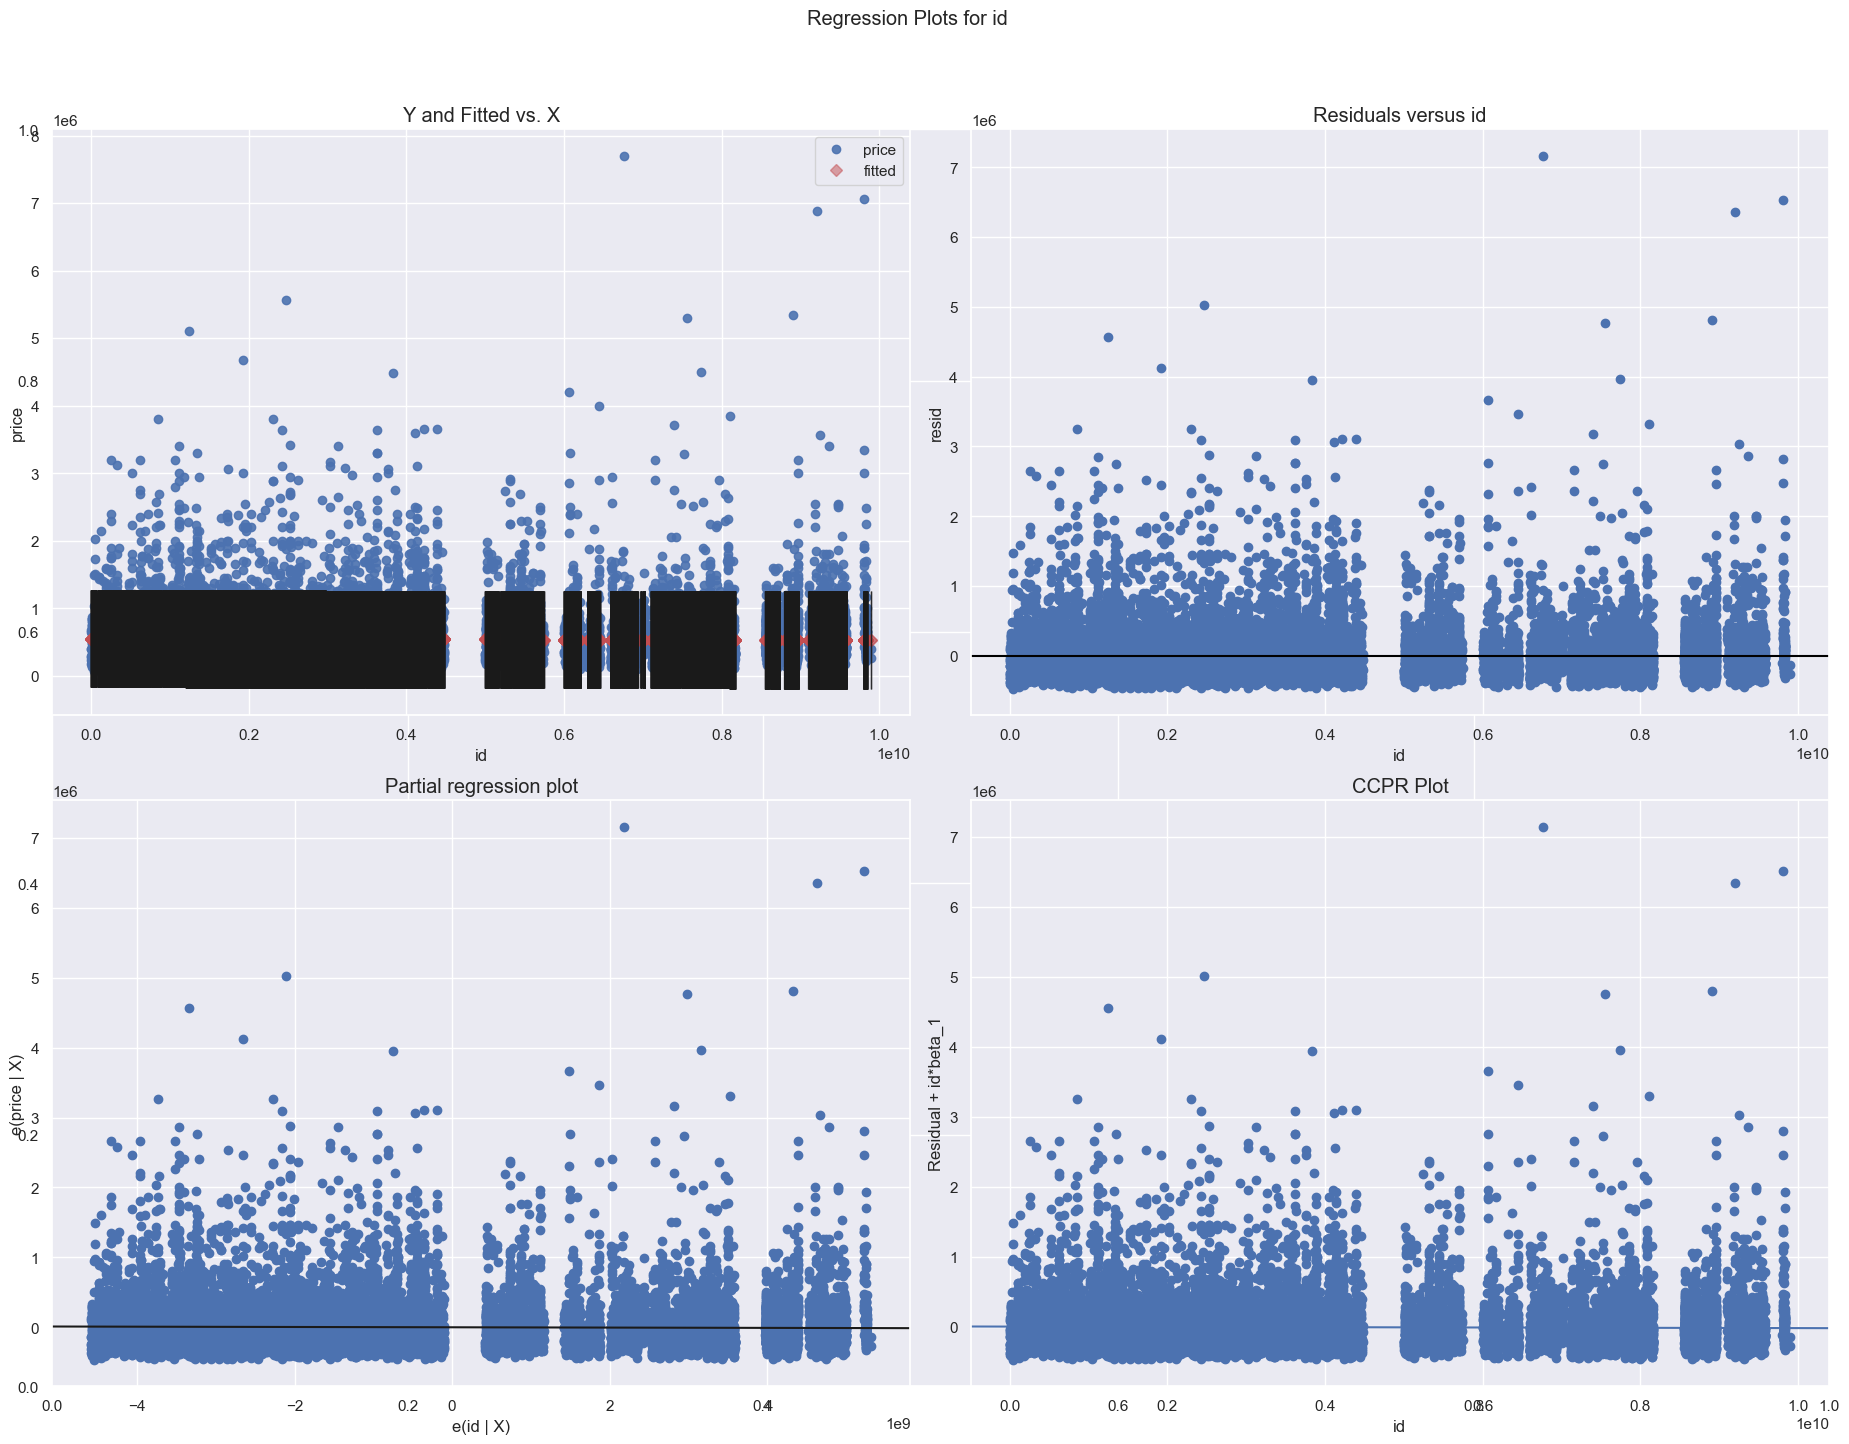

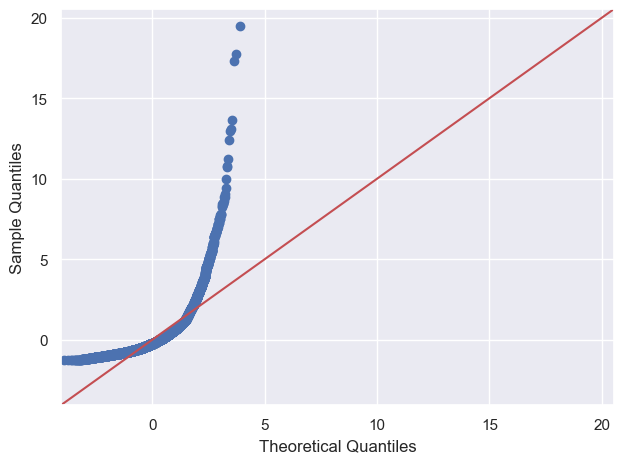

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ price
-----------------------------------------------------------------------------
eval_env: 1


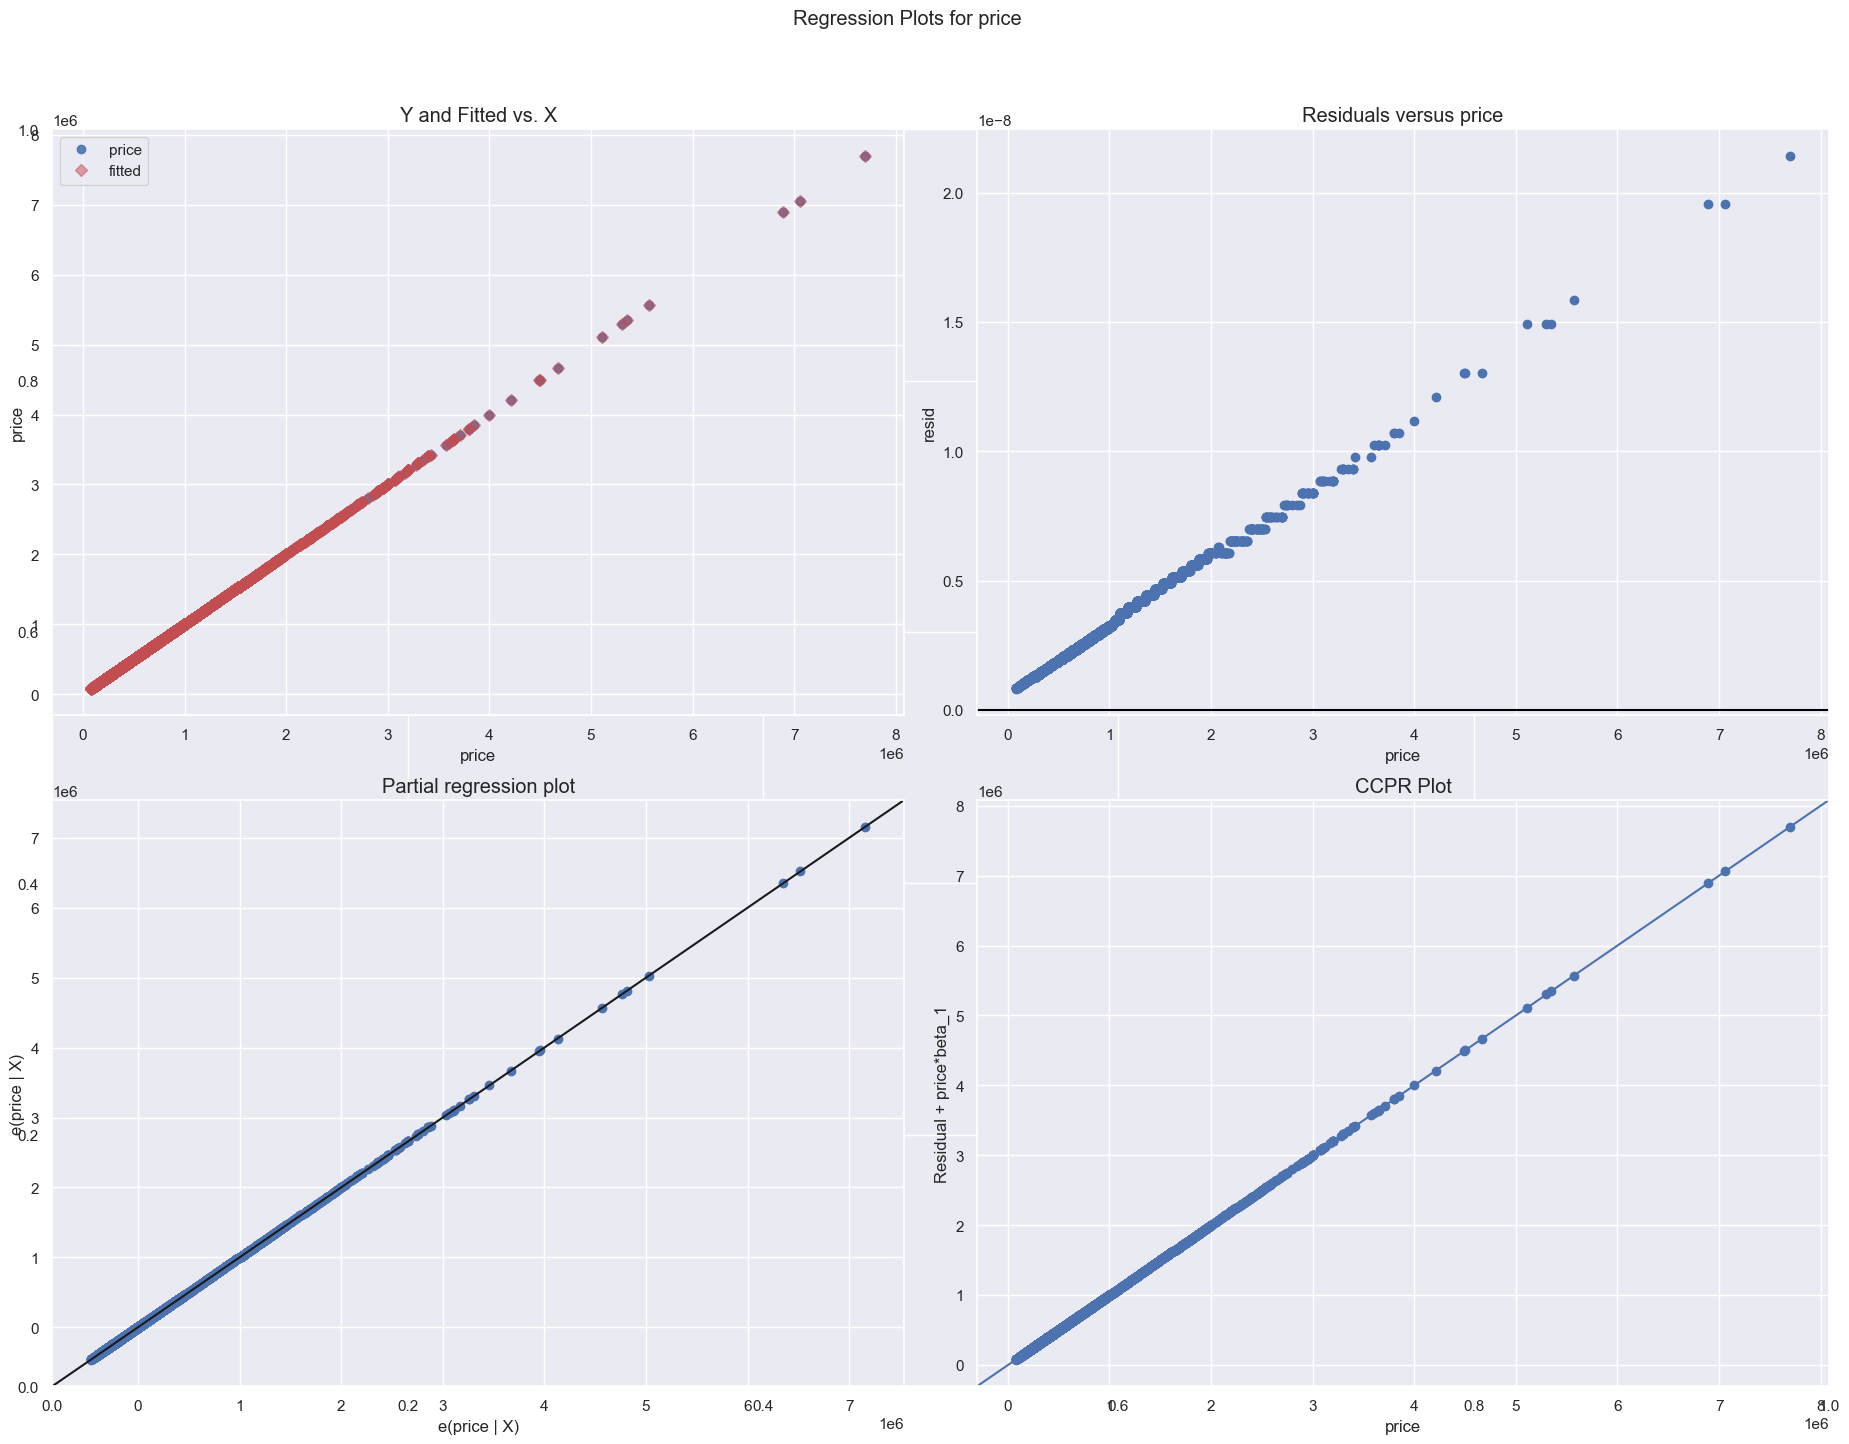

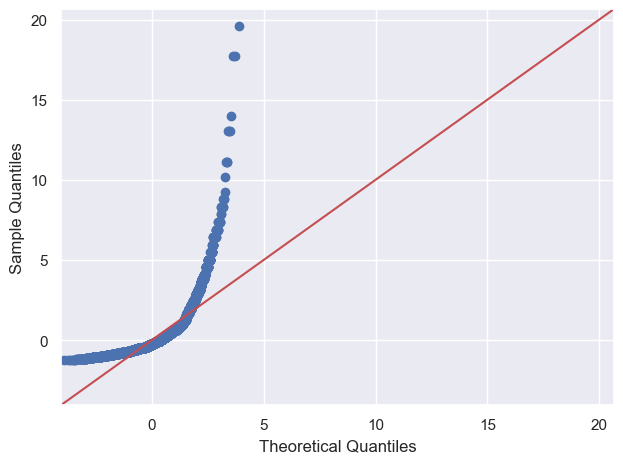

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ bedrooms
-----------------------------------------------------------------------------
eval_env: 1


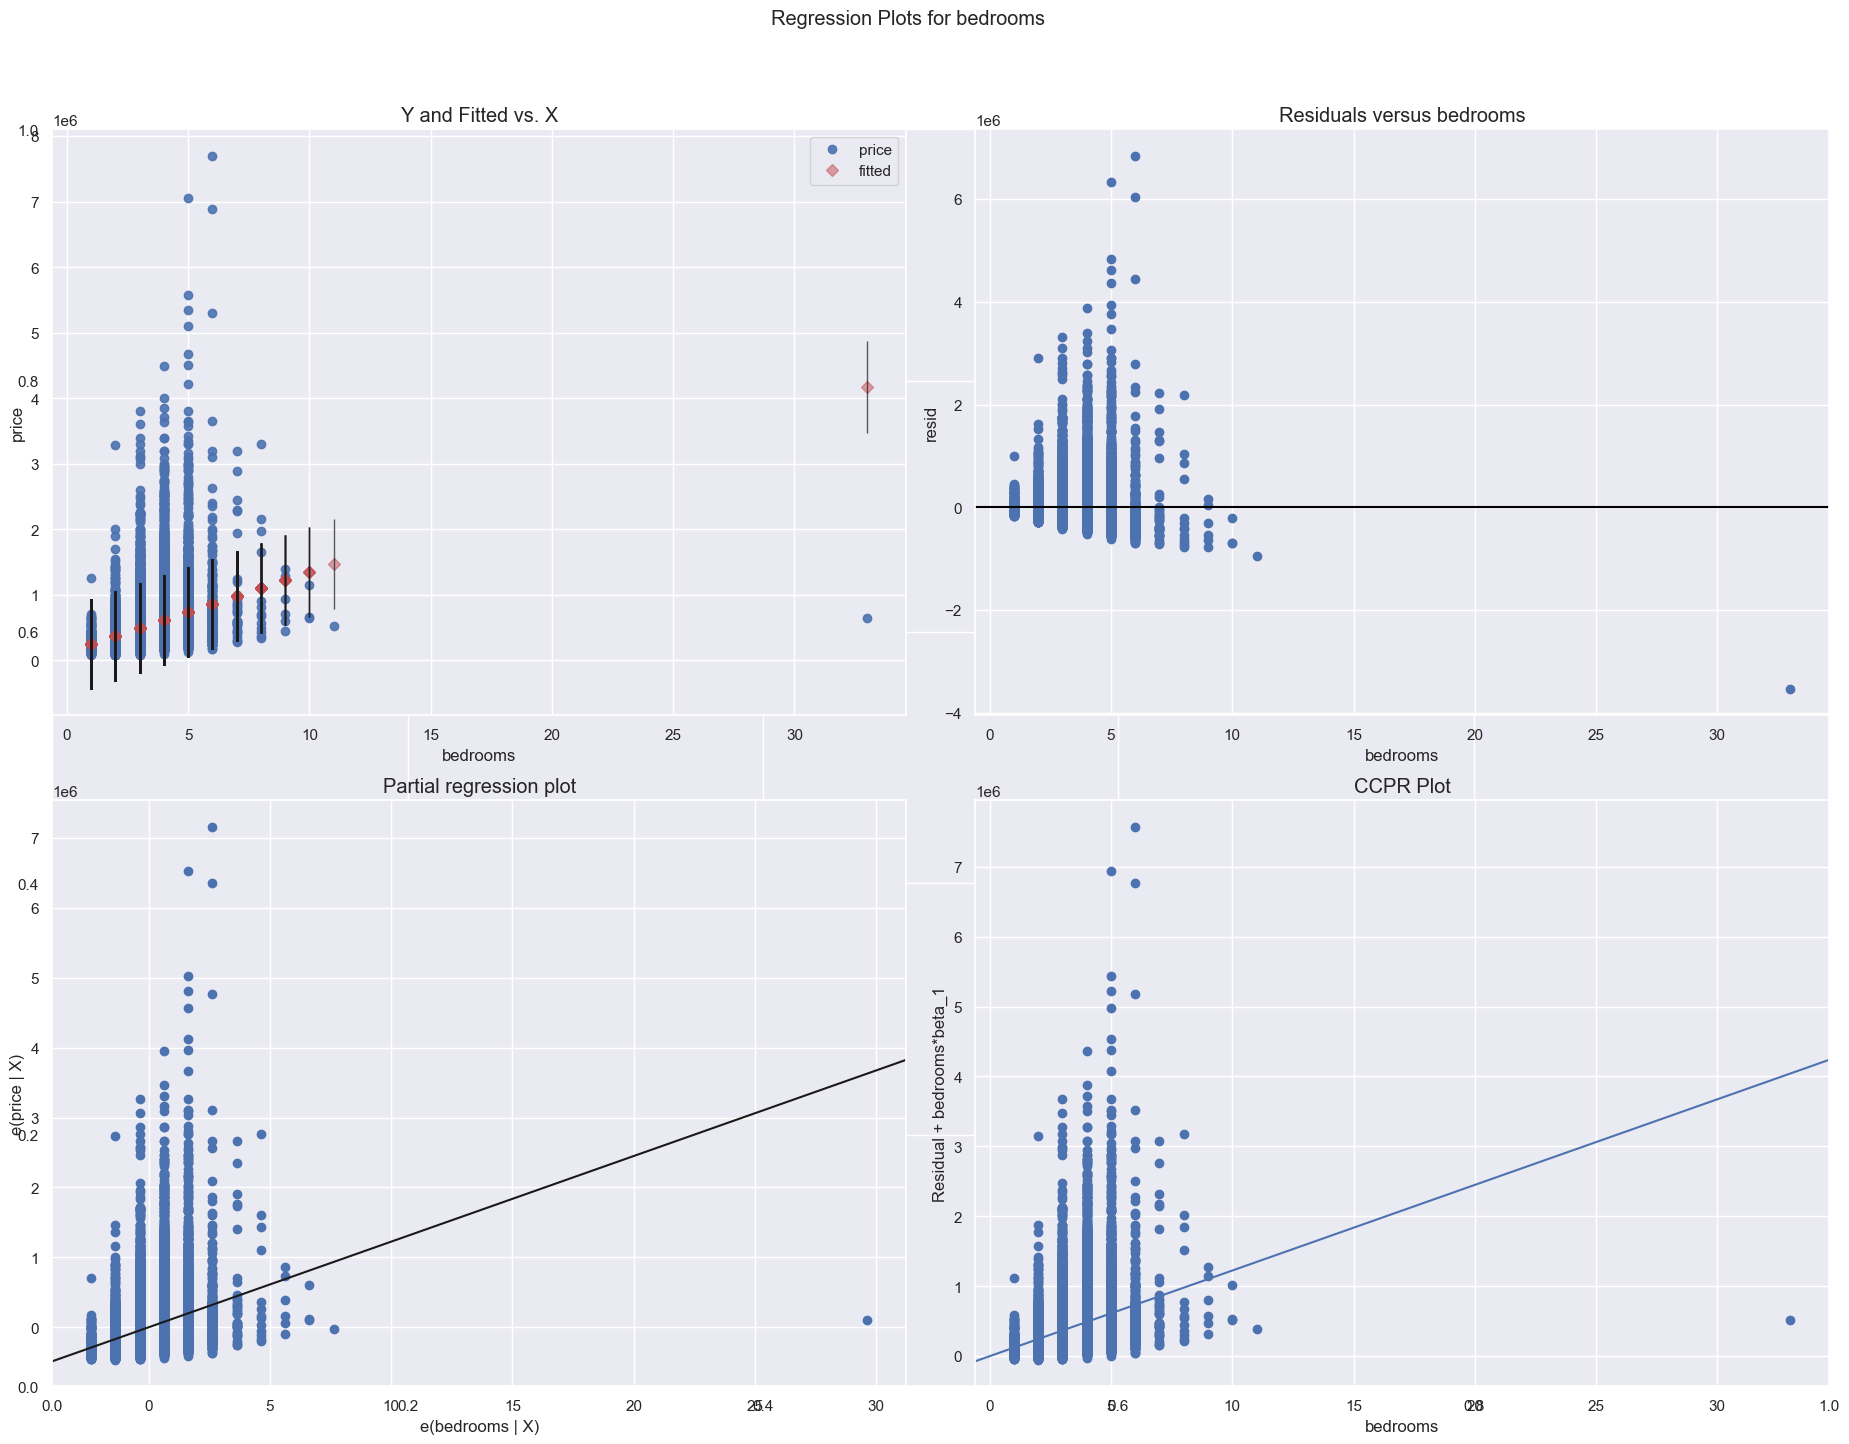

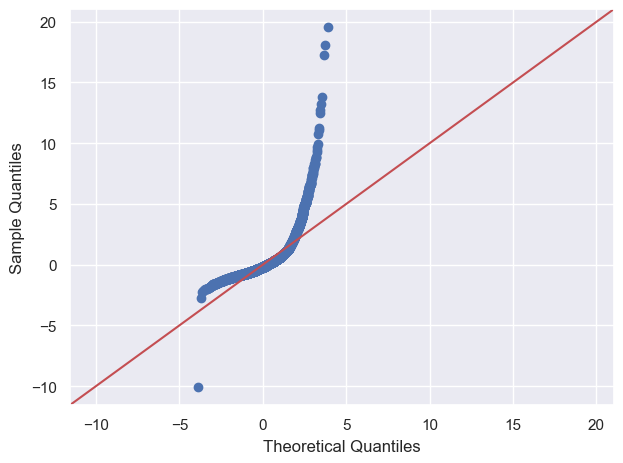

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ bathrooms
-----------------------------------------------------------------------------
eval_env: 1


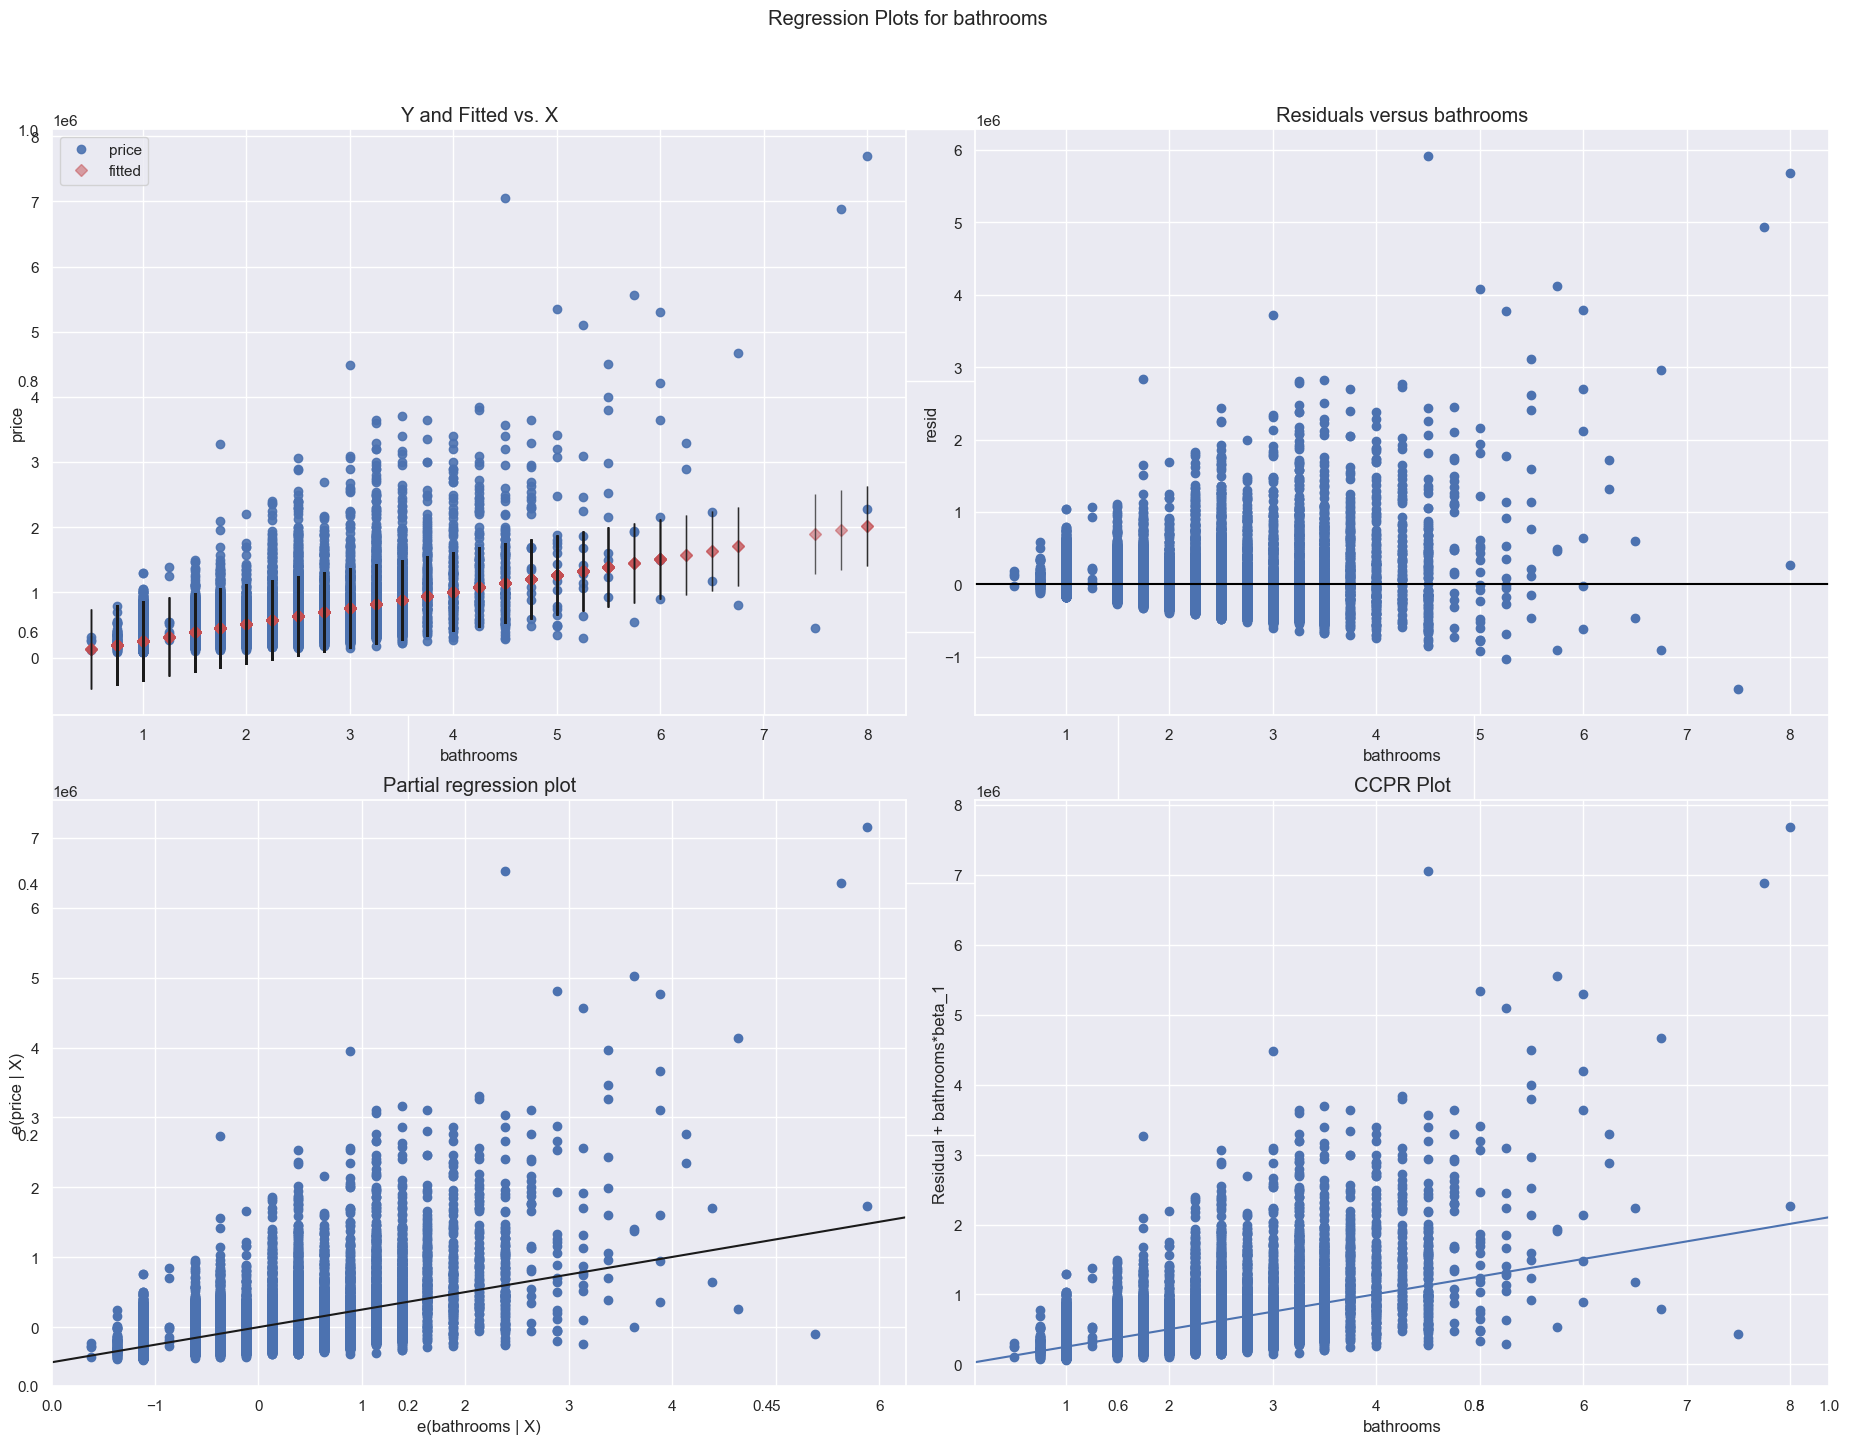

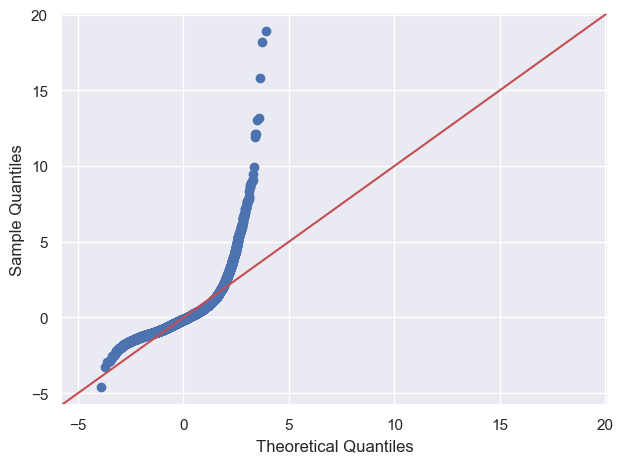

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ sqft_living
-----------------------------------------------------------------------------
eval_env: 1


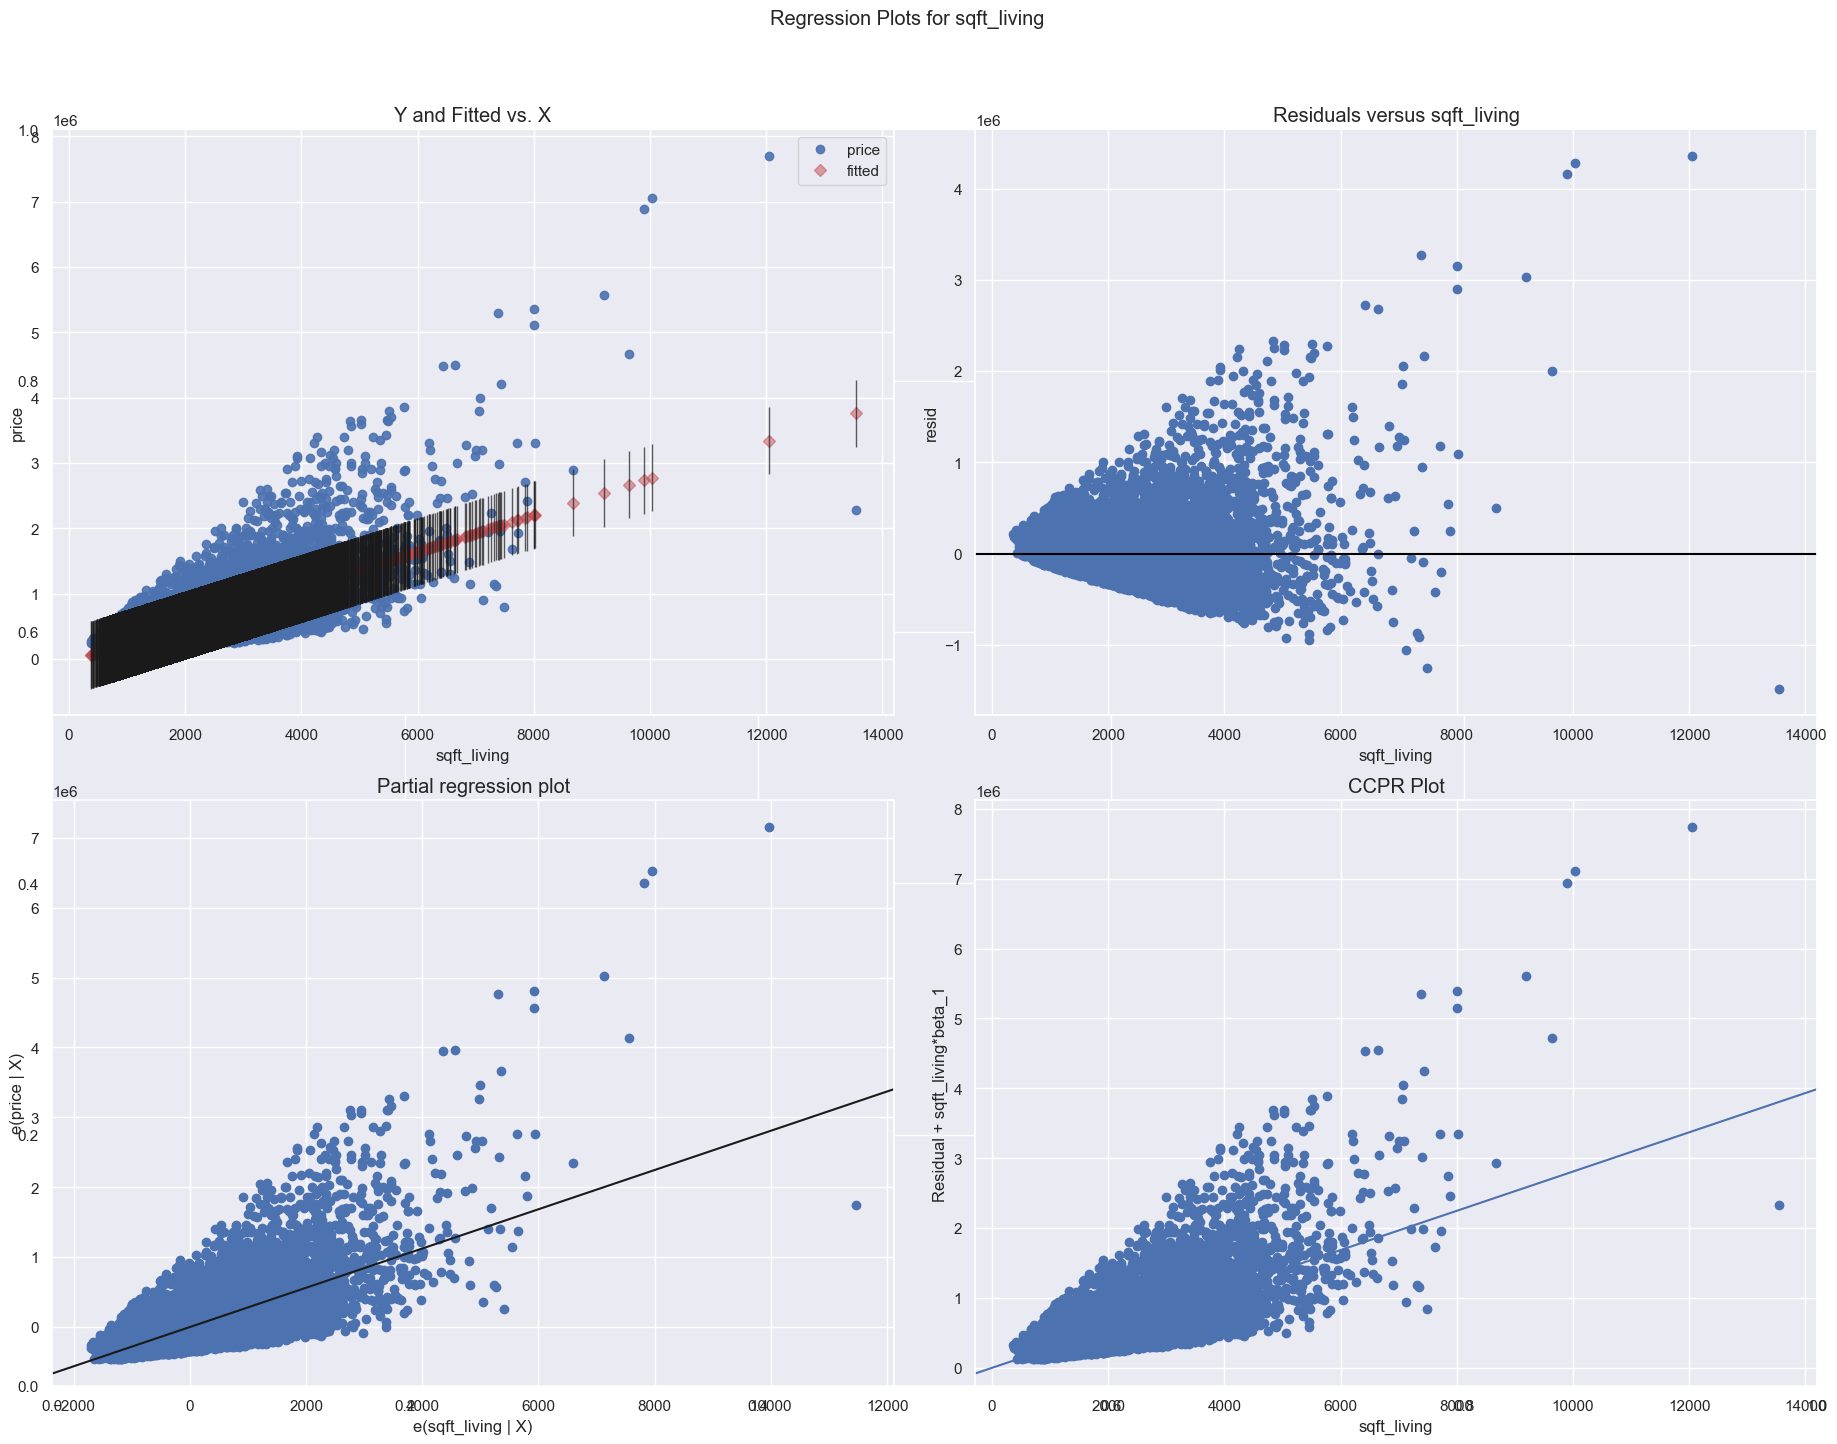

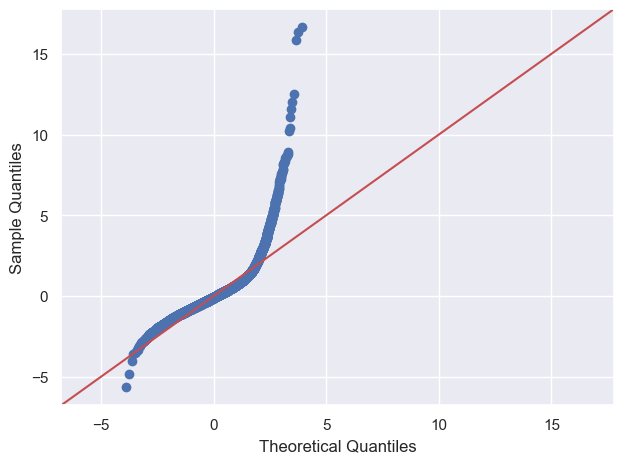

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ sqft_lot
-----------------------------------------------------------------------------
eval_env: 1


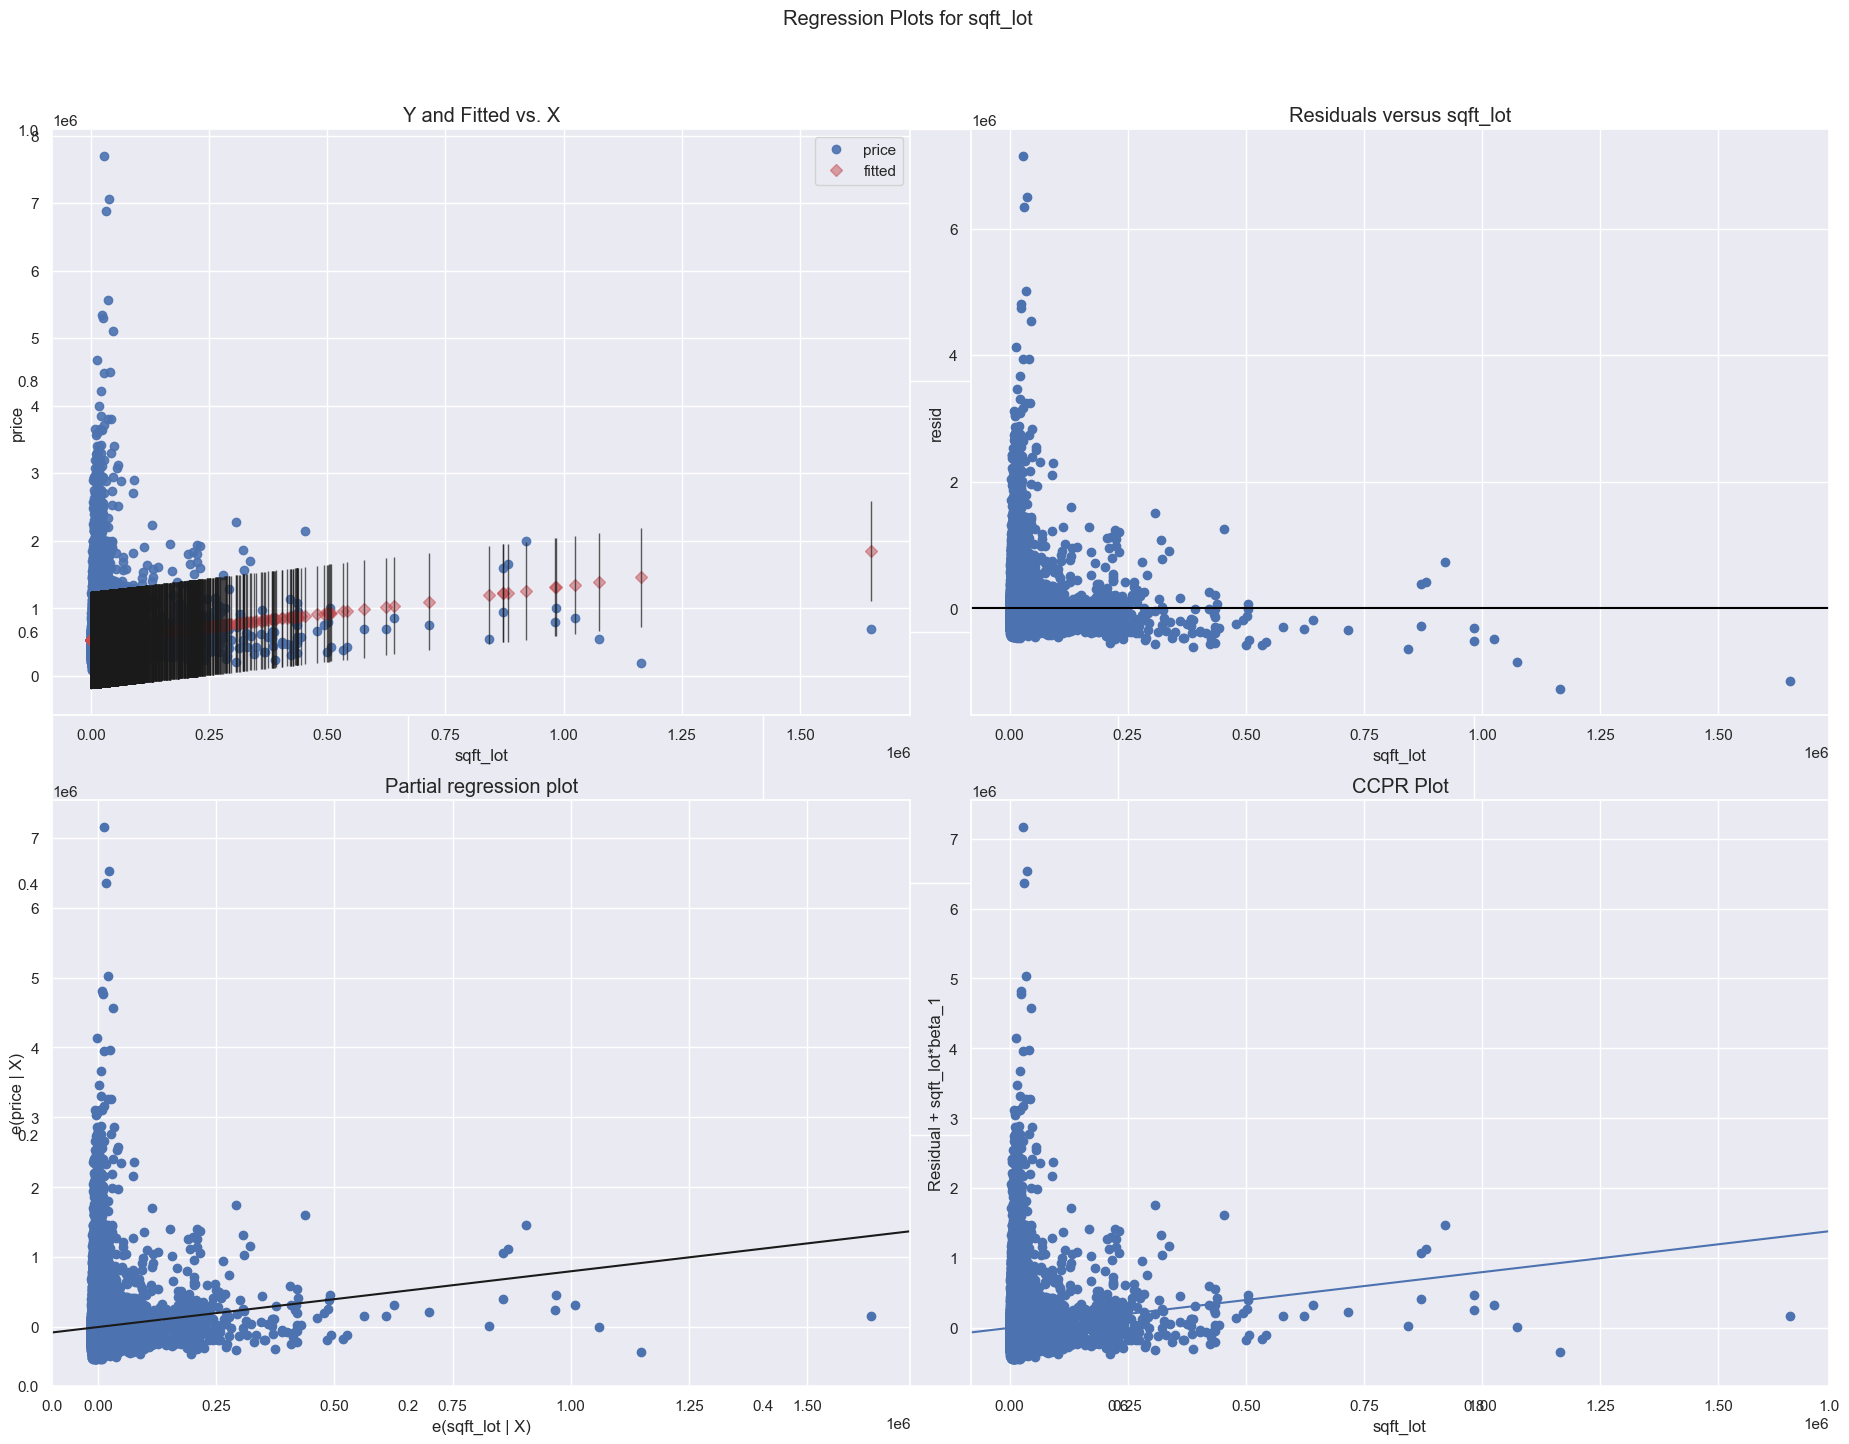

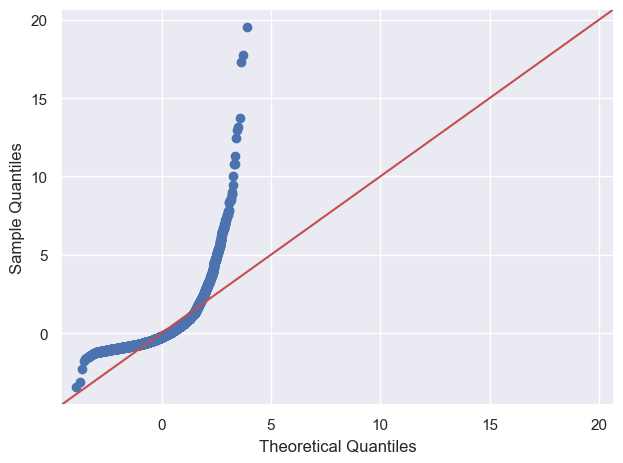

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ floors
-----------------------------------------------------------------------------
eval_env: 1


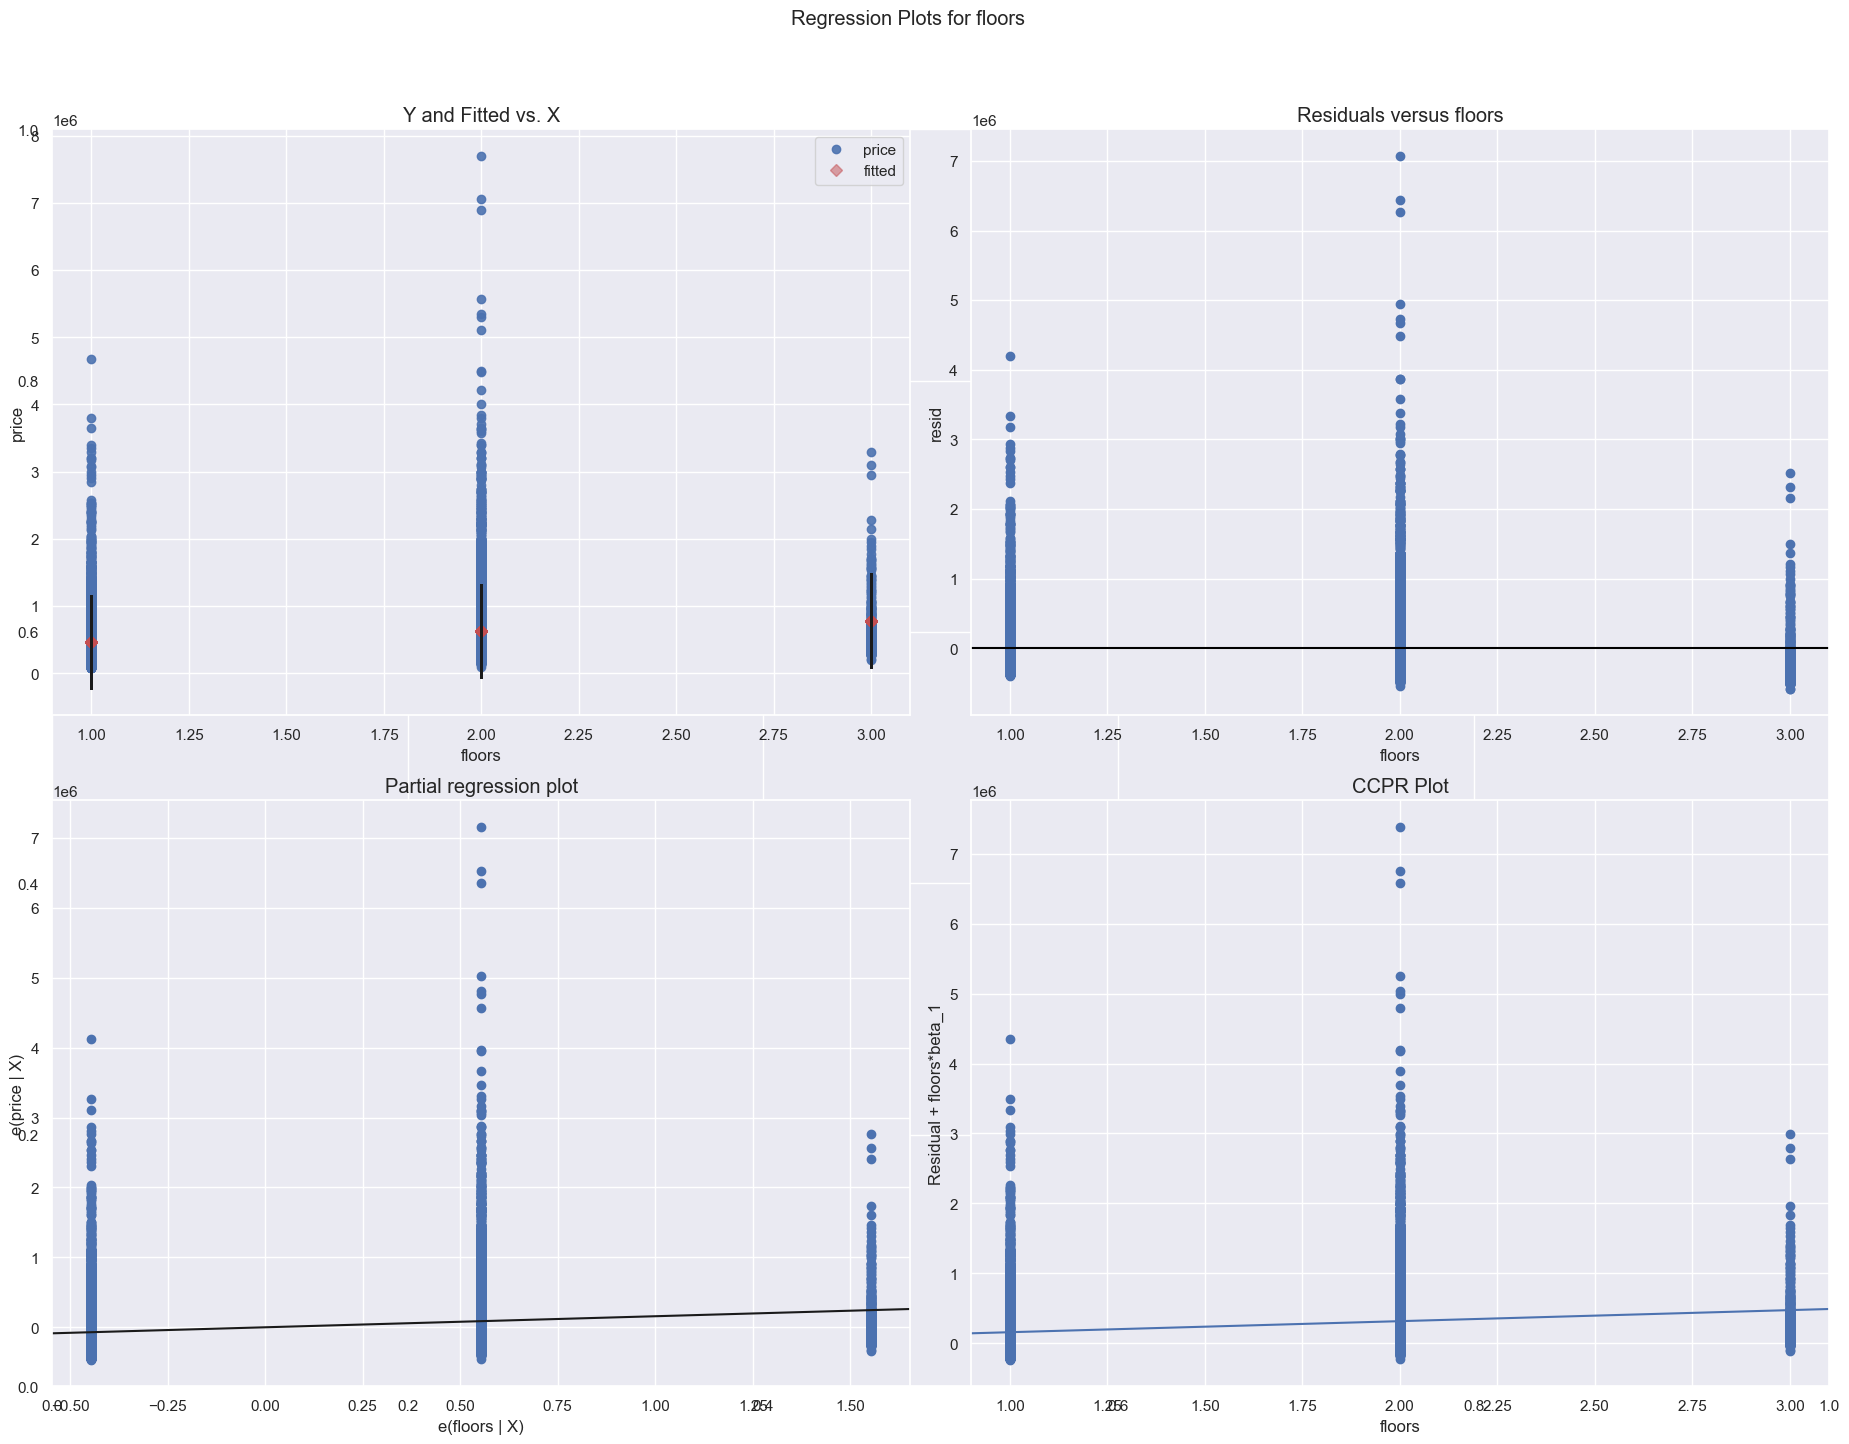

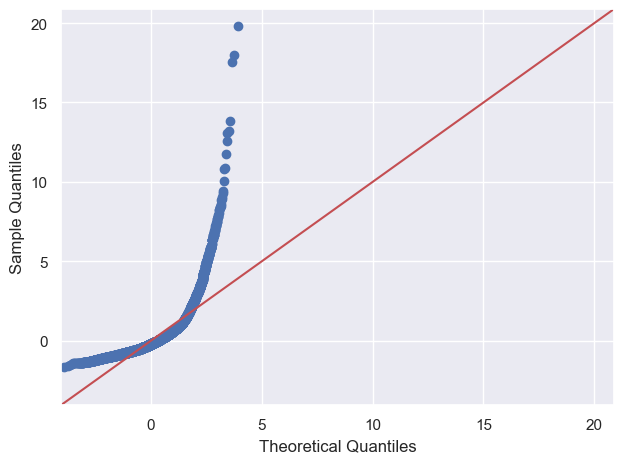

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ waterfront
-----------------------------------------------------------------------------
eval_env: 1


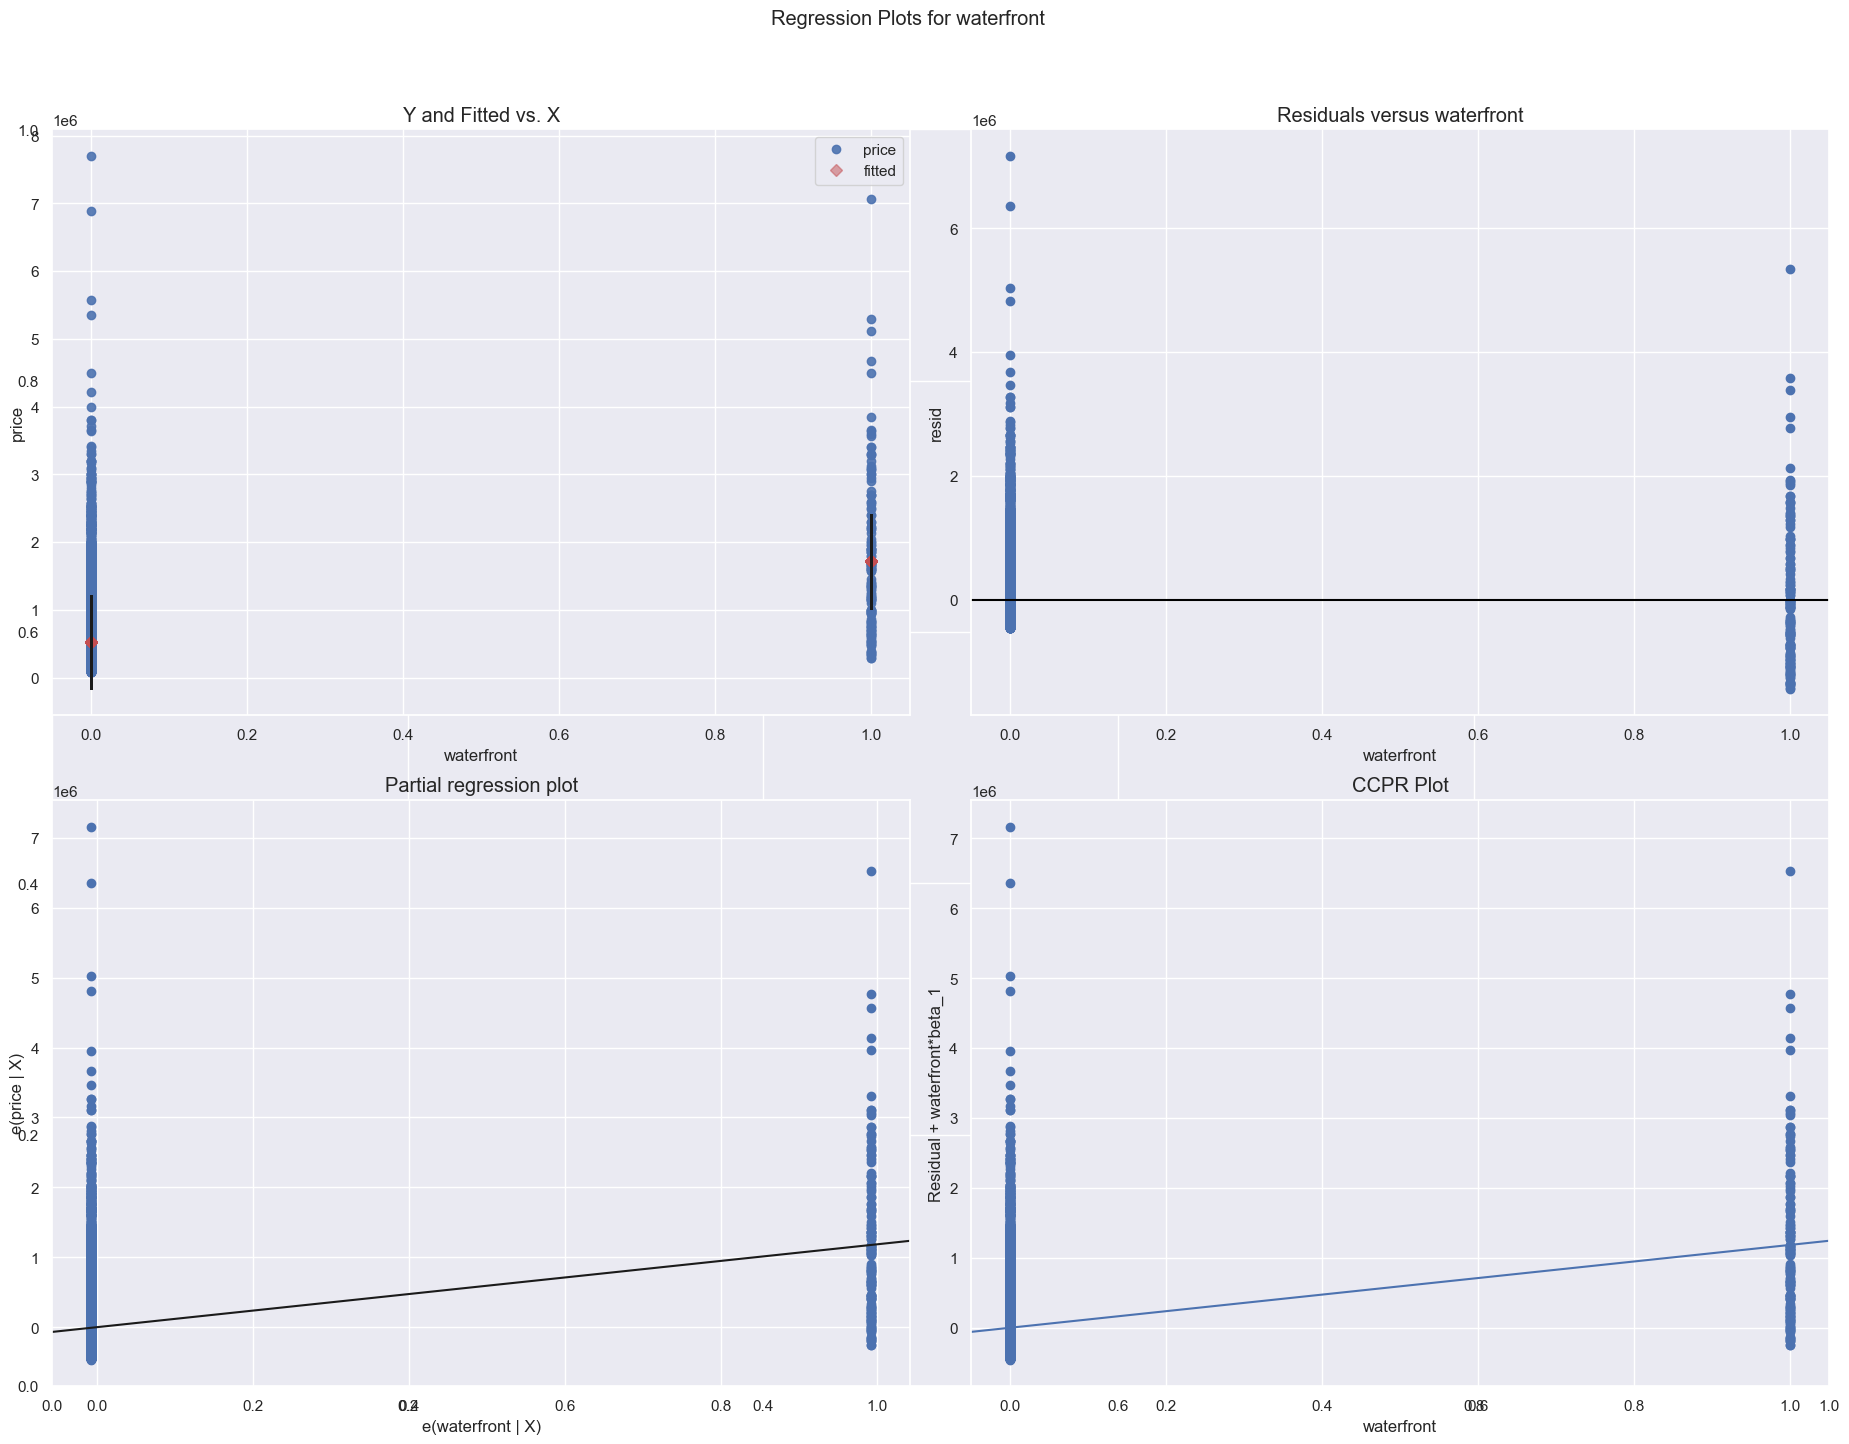

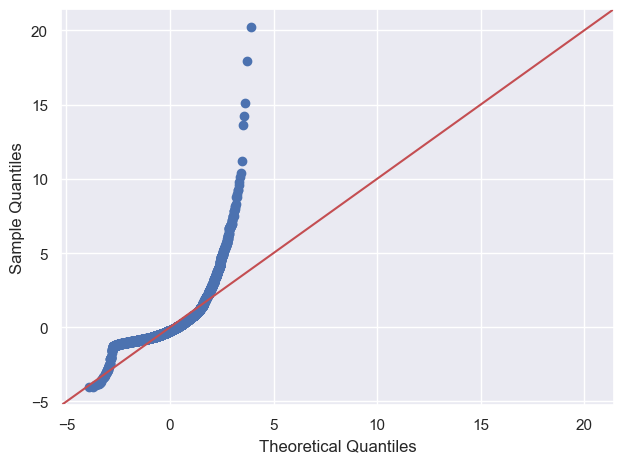

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ condition
-----------------------------------------------------------------------------
eval_env: 1


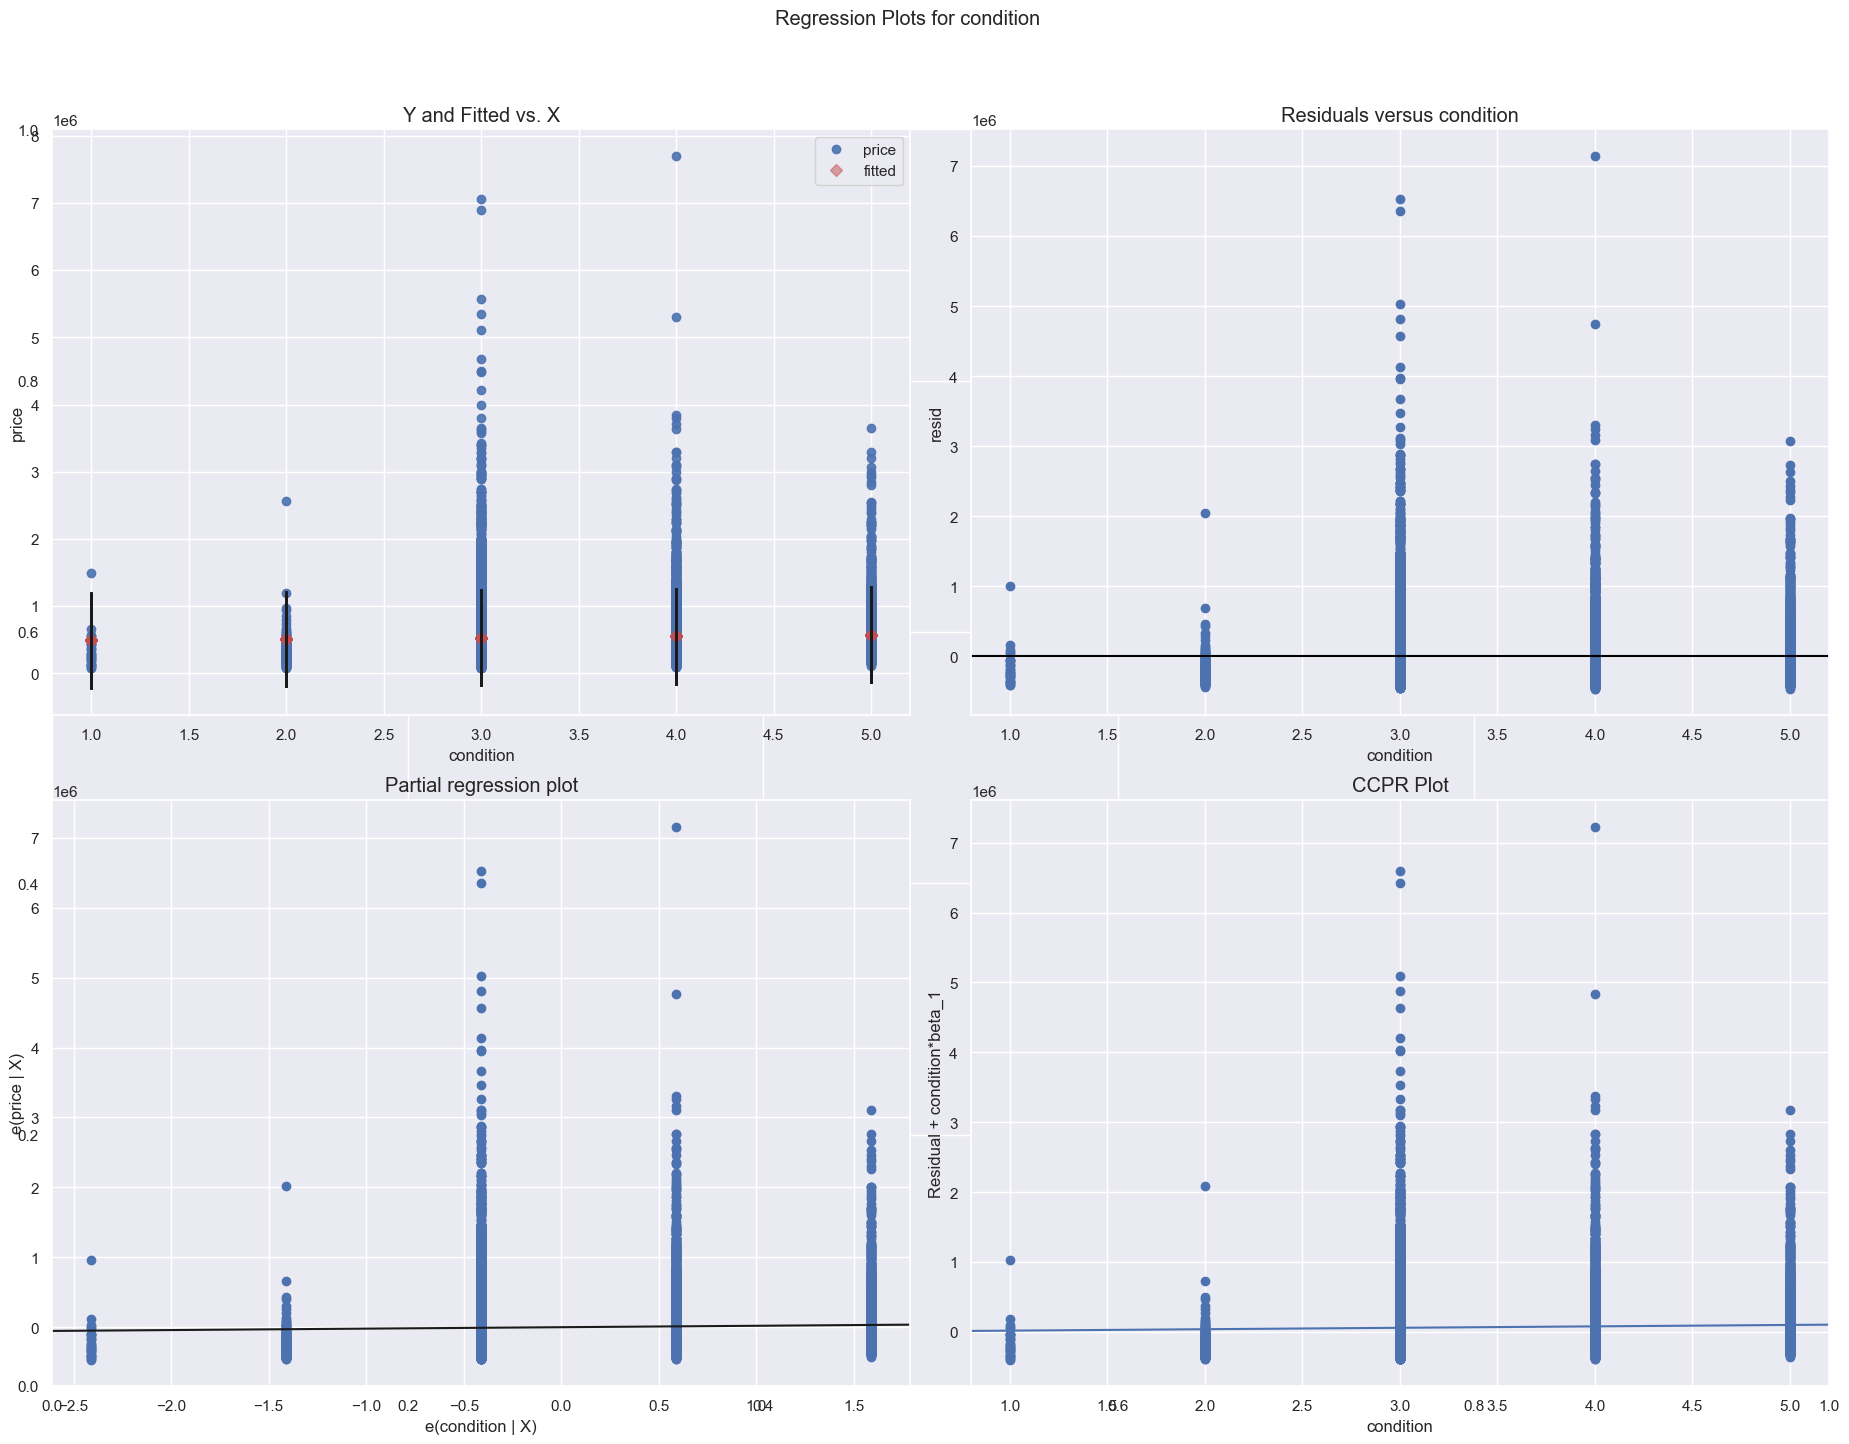

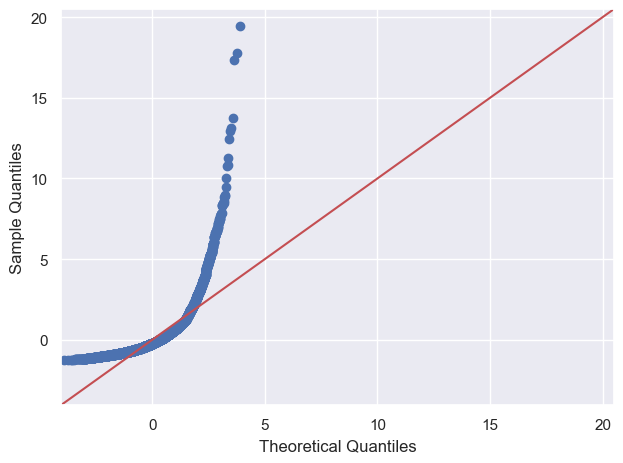

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ grade
-----------------------------------------------------------------------------
eval_env: 1


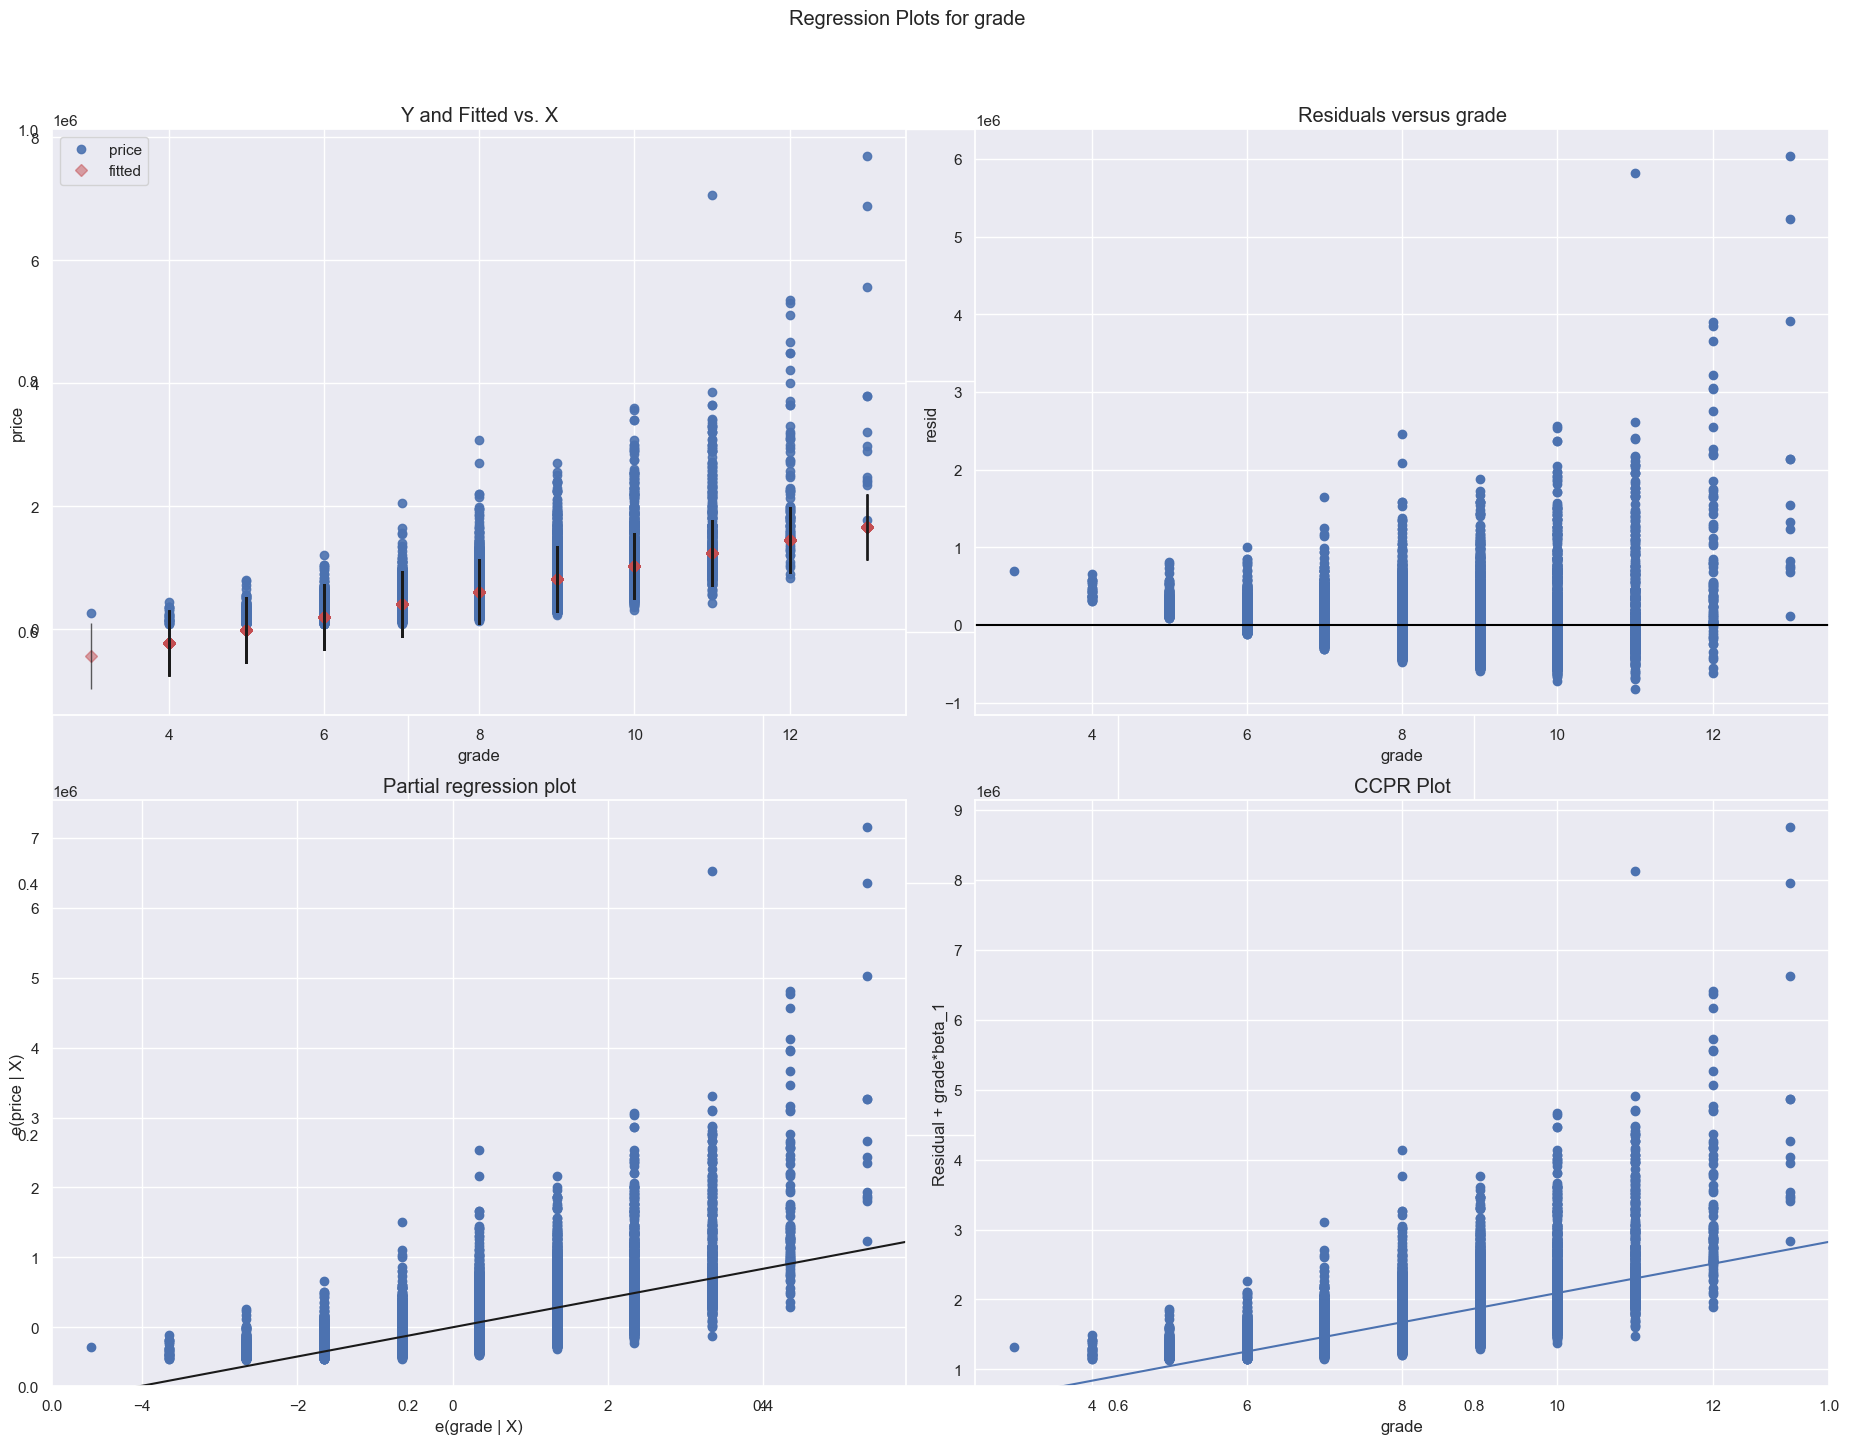

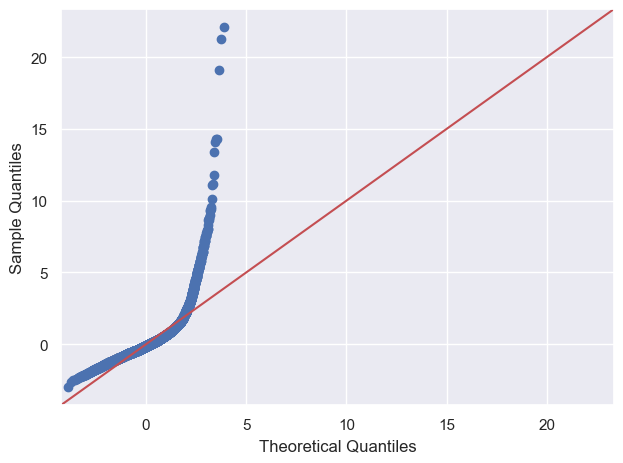

Press Enter to continue......
KC Housing Dataset - Regression Analysis and Diagnostics for price ~ yr_built
-----------------------------------------------------------------------------
eval_env: 1


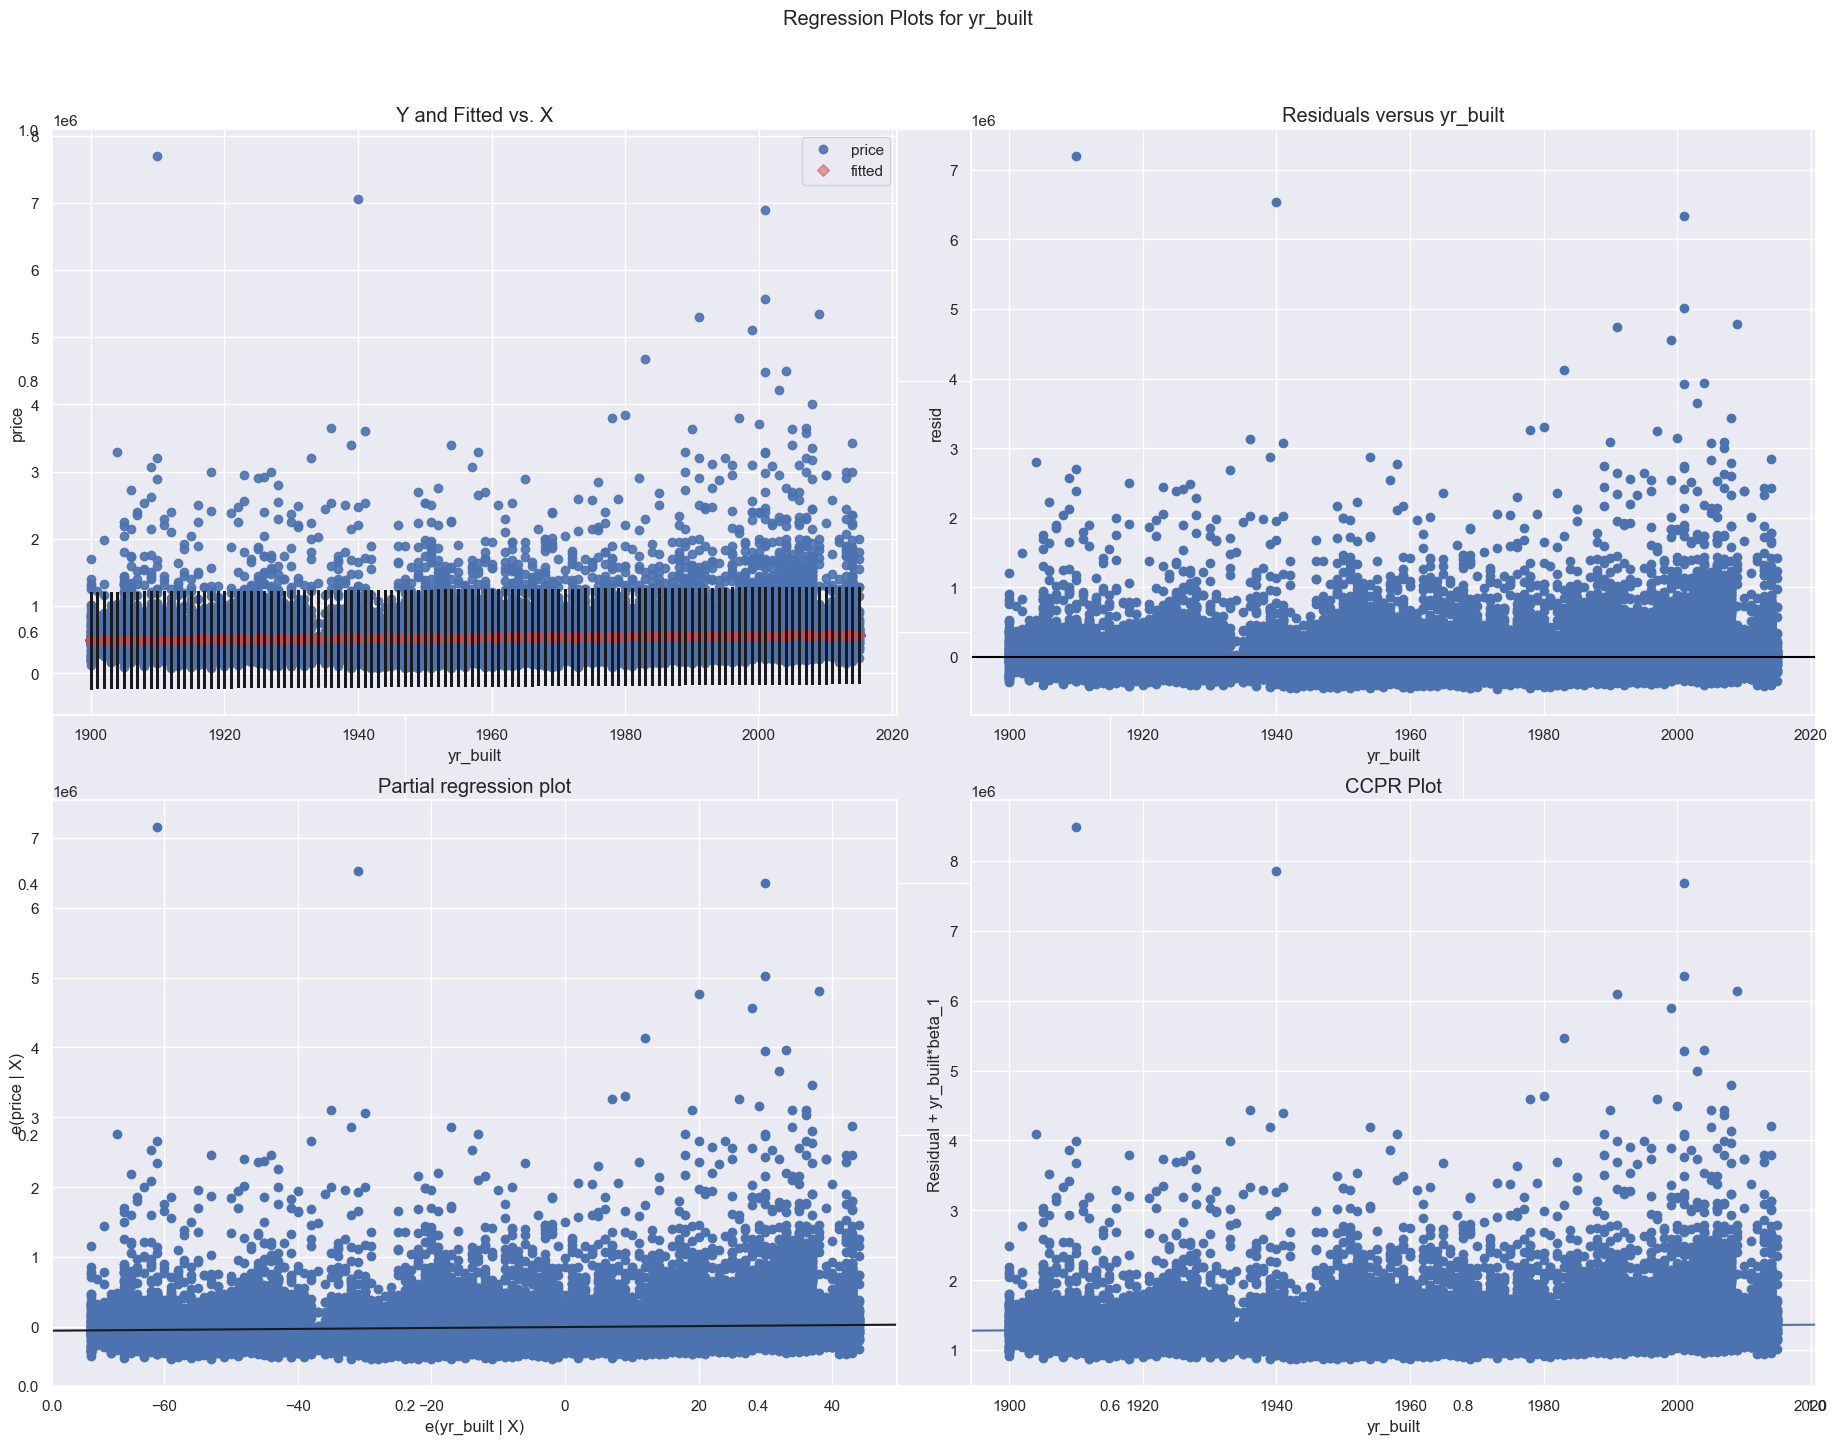

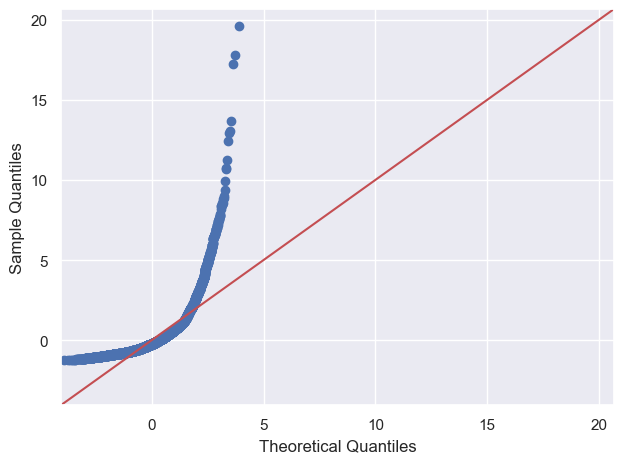

Press Enter to continue......


In [27]:
#plotting the qq plots to visualise the normal distributions
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
results = []
for index, column in enumerate (dataset1.columns):
    print(f'KC Housing Dataset - Regression Analysis and Diagnostics for price ~ {column}')
    print('-----------------------------------------------------------------------------')

    f = f'price~{column}'
    model = smf.ols(formula = f, data = dataset1).fit()
    
    
    fig,axes = plt.subplots(figsize = (19,15))
    fig = sm.graphics.plot_regress_exog(model, column, fig = fig)
    fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True)
    fig.tight_layout()
    plt.show()
          
    results.append([column, model.rsquared, model.params[0],model.params[1],model.pvalues[1],sms.jarque_bera(model.resid)[0]])
    input('Press Enter to continue......')



In [28]:
#Given that our data has a large dataset, we can proceed to use other techniques such as:

In [29]:
#Using the J.B technique to test for Normality

name = ['Jarque-Bera','Prob','Skew','Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name,test))

[('Jarque-Bera', 1142027.5024504988),
 ('Prob', 0.0),
 ('Skew', 4.0311448863154835),
 ('Kurtosis', 37.70261526673775)]

In [59]:
pd.DataFrame(results, columns = ['ind_var','r_squared','intercept','slope','p-value','normality(JB)'])

,ind_var,r_squared,intercept,slope,p-value,normality(JB)
0,id,0.000281,5.501079e+05,-2.142760e-06,1.368088e-02,1.135571e+06
1,price,1.000000,-6.075425e-10,1.000000e+00,0.000000e+00,1.147588e+06
2,bedrooms,0.095355,1.271777e+05,1.224698e+05,0.000000e+00,1.194618e+06
3,bathrooms,0.276583,8.699469e+03,2.512487e+05,0.000000e+00,8.823435e+05
4,sqft_living,0.492691,-4.399123e+04,2.808651e+02,0.000000e+00,5.424183e+05
5,sqft_lot,0.008078,5.282534e+05,7.973094e-01,5.612829e-40,1.147230e+06
6,floors,0.056298,3.118123e+05,1.580188e+05,4.739178e-274,1.239564e+06
7,waterfront,0.069858,5.322819e+05,1.184933e+06,0.000000e+00,9.093357e+05
8,condition,0.001300,4.708525e+05,2.036488e+04,1.154259e-07,1.136326e+06
9,grade,0.446179,-1.061492e+06,2.091698e+05,0.000000e+00,2.043047e+06


In [66]:
dataset1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,21594.000000
mean,-1.957826e-17,7.288377e-17,-4.330045e-17,1.280008e-14,2.386100e-16,5.393533e-17,-4.298736e-14,2.852340e-15,-6.913593e-15,3.061787e-15,1970.998148
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,29.374461
min,-1.591861e+00,-1.258306e+00,-2.561898e+00,-2.101113e+00,-1.862740e+00,-3.520610e-01,-8.083104e-01,-8.250361e-02,-3.704212e+00,-3.970047e+00,1900.000000
25%,-8.541974e-01,-5.941677e-01,-4.028790e-01,-4.756773e-01,-7.082637e-01,-2.429227e-01,-8.083104e-01,-8.250361e-02,-6.299680e-01,-5.606876e-01,1951.000000
50%,-2.347826e-01,-2.457675e-01,-4.028790e-01,1.744968e-01,-1.854822e-01,-1.806511e-01,-8.083104e-01,-8.250361e-02,-6.299680e-01,-5.606876e-01,1975.000000
75%,9.485003e-01,2.849986e-01,6.766307e-01,4.995838e-01,5.115598e-01,-1.065844e-01,1.004407e+00,-8.250361e-02,9.071539e-01,2.916523e-01,1997.000000
max,1.849214e+00,1.948784e+01,3.198241e+01,7.651499e+00,1.248108e+01,3.950849e+01,2.817124e+00,1.212012e+01,2.444276e+00,4.553351e+00,2015.000000


#### Observations:

- The r_squared for all variables is quite low, despite normalising the data.
- The sqft_living has the highest r_squared followed by the grade.
- These two variables could be presumed to have some correlation with the price of houses.

In [60]:
#testing for homoscedasticity using G.Q technique ( using sqft_living and grade variables)

dataset3 = dataset1.loc[:,['sqft_living','grade']]
dataset3

,sqft_living,grade
0,-0.980546,-0.560688
1,0.533342,-0.560688
2,-1.427088,-1.413027
3,-0.131026,-0.560688
4,-0.435982,0.291652
...,...,...
21592,-0.599351,0.291652
21593,0.250169,0.291652
21594,-1.154806,-0.560688
21595,-0.523112,0.291652


In [64]:
lwr_thresh = dataset3.quantile(q=.45)
upr_thresh = dataset3.quantile(q=.55)
middle_10percent_indices = dataset1[(dataset1.dataset3>= lwr_thresh) & (dataset3<= upr_thresh)].index


AttributeError: 'DataFrame' object has no attribute 'dataset3'

In [63]:
#performing the Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid.iloc[index],model.model.exog[index])
list(zip(name,test))

ValueError: not enough values to unpack (expected 2, got 1)

### Results and Conclusions

- There is a correlation between the square ft living area, footage of the lot and the price of the houses.

- Most houses have a 1 and 1/2 bathrooms.
- The average sqft_living area is approximately 900 square metres with an average price of 100000.
- Houses with a larger living area, have a higher purchase price but the number is low, indicating lower demand compared to the less expensive houses.
- All houses sampled in the dataset do not have a waterfront.
- 



